# Introduction

**Background Project**: \
KreditDulu as Credit Company using Machine Learning (ML) based on Alternate Data + Manual (Traditional) Credit Data to help them deciding credit scoring for each borrower in order to enables provision of fair interest rate and reduce risk of potential default (also collections stage to assess how likely a customer in collections is to pay back their debt).

**Objective**: \
KreditDulu requires Credit Scoring through the utilization of Machine Learning, as well as manual data and alternate data, to assist the lender in determining whether to approve/extend or deny credit to borrowers

**Expected Output**: \
KreditDulu can use a machine learning model that can classify the credit score.

Dataset: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Quick summary about Credit Scoring:
1. What is credit scoring?
* Credit Risk Modeling to help decide accept/deny credit who performed by lenders and financial institution to determine creditworthiness of potential borrowers or applicants (a person or owner of small-operated business) for loans or credit services
* Main purpose of credit scoring is to rank a borrower's credit riskiness, but not provide an estimate of a borrower's default probability
* Credit scoring apply to corporations and government, while credit scoring applies to individuals and small-operated business
* Banker will validate identity of prospective debtor to SLIK (look point of 2)
* Generally bigger amount of the loan then need more effort and variables (need more Know-Your-Customer information) to do scoring
* Addition of alternative credit scoring (in Indonesia) also can be used which regulated by OJK in POJK no. 13/POJK.02/2018

2. How process of Credit Scoring?
* Move with the times, there is an upgrade from conventional credit scoring mechanisms that use assorted paperwork and manual credit history (traditional data) to the new credit scoring mechanisms that combine traditional data with alternative data such as social media, electronic transactions and cellular data to conduct and assess the consumer's feasibility study as they usually do not have access to banking services (unbanked). [4]
* In Indonesia this process was better known as BI-Checking, and now is know as IDEB (Informasi Debitur) in system of SLIK (Sistem Layanan Informasi Keuangan/Finance Information Service System). For the full description can see on the image below. [5]

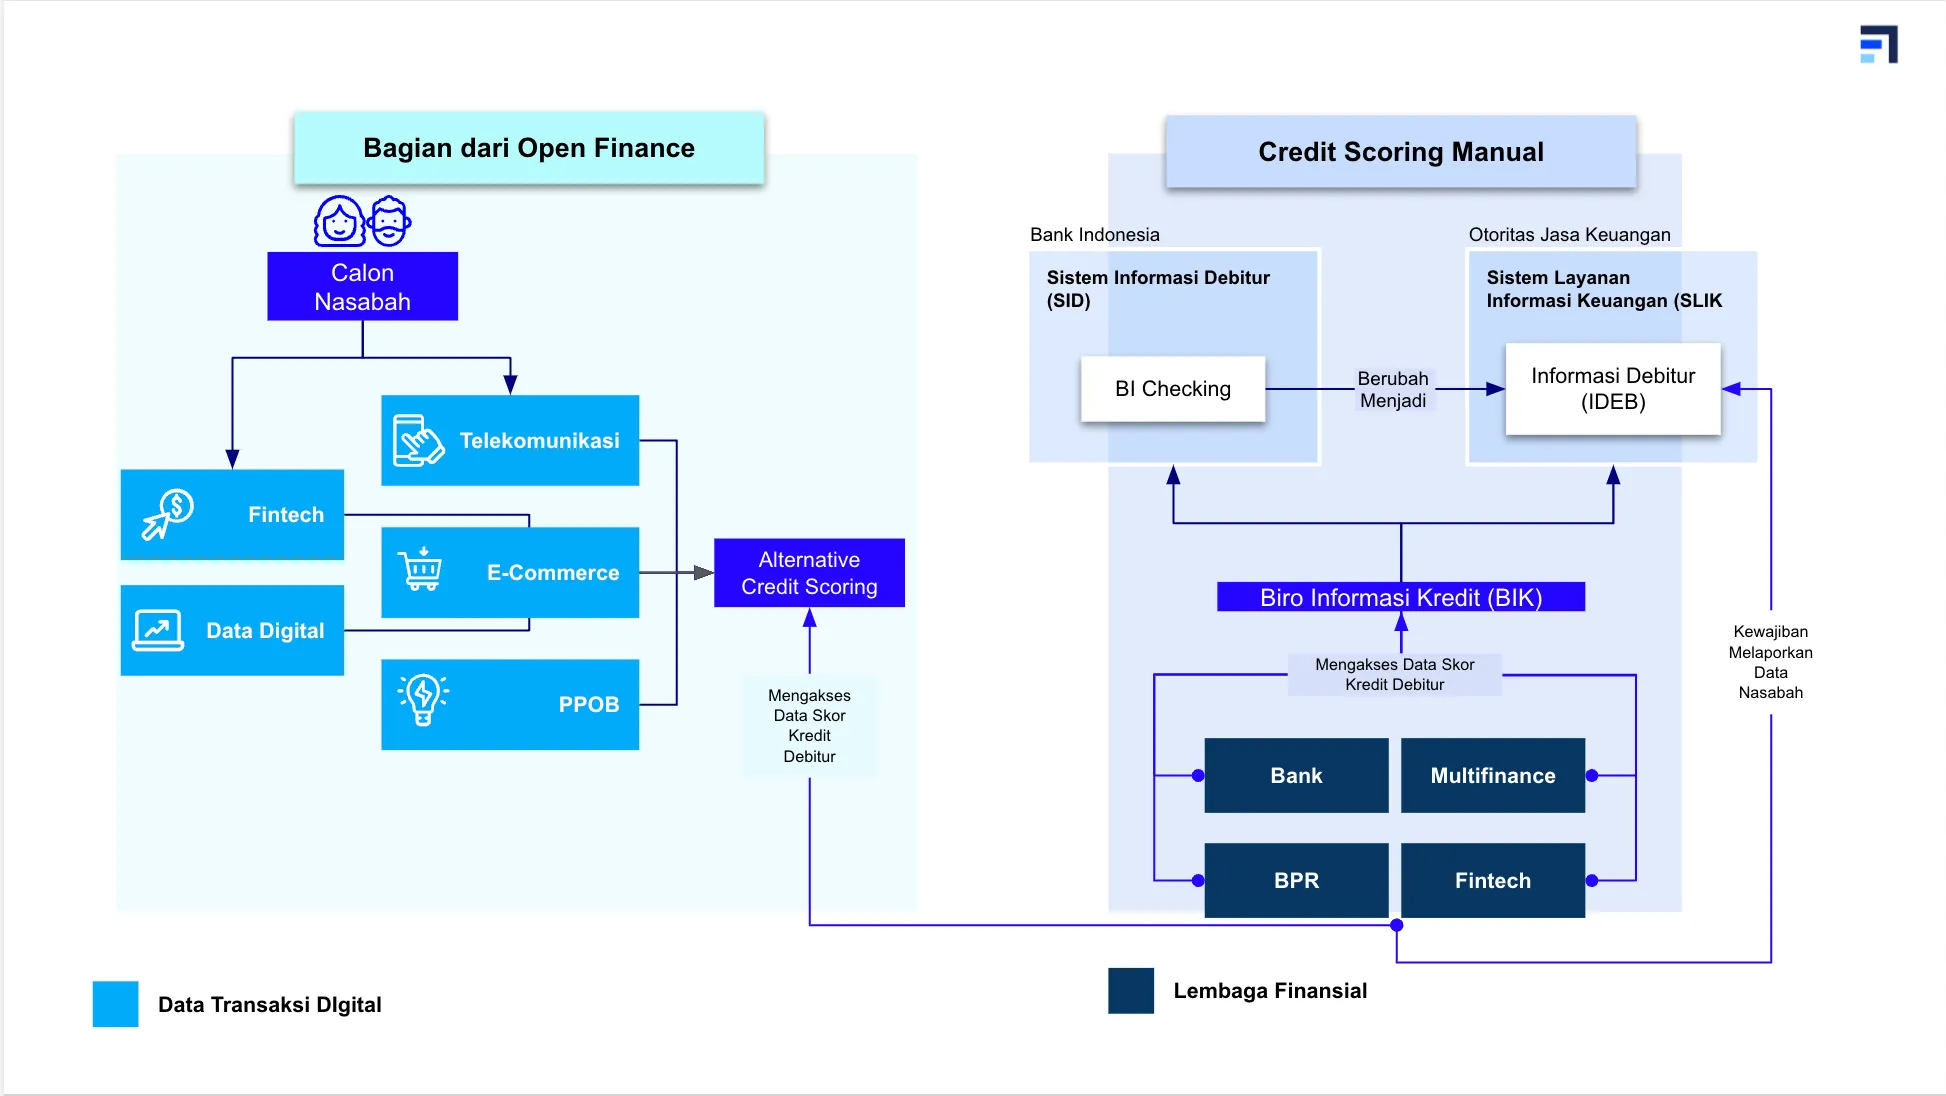

3. What parameter of scoring in Credit Scoring?:
* There 5C principles which are Character, Capacity, Capital, Condition, Collateral and 5P principles which are 5 Personality, Purpose, Prospect, Payment, Party. [1]
* Based on POJK no. 40/POJK.03/2019, there are 5 scores category (lancar/1, dalam perhatian khusus/2, kurang lancar/3, diragukan/4 & macet/5), which 1 will be accepted, 2 would be accepted, and 3,4,5 would not be accepted. So for simplify there are 3 classification for there scoring, excellent, good and poor. [1]

4. How many model of credit scoring that can be used?
* Mostly there are 2 models, FICO score (Fair Isaac Corporation's Credit), employed 90% of top lenders, while other is VantageScore that created by top 3 credit-reporting agencies, TransUnion, Experian and Equifax. [2]
___
Source: <br>
[1] https://id.blog.finantier.co/mengenal-credit-scoring-dan-teknologi-pendukungnya-8360edcf5c42 <br>
[2] https://www.investopedia.com/terms/c/credit_scoring.asp#:~:text=Credit%20scoring%20is%20a%20statistical,to%20extend%20or%20deny%20credit <br>
[3] https://www.weforum.org/agenda/2021/01/this-new-approach-to-credit-scoring-is-accelerating-financial-inclusion/ <br>
[4] https://repository.cips-indonesia.org/media/publications/560780-the-rise-of-innovative-credit-scoring-sy-0f4556b9.pdf <br>
[5] https://id.blog.finantier.co/perkembangan-credit-scoring-indonesia-bdae9b66984

Features Description:<br>
A. Traditional Information:
1. ID: A unique identifier for each record
2. Customer_ID: A unique identifier for each customer
3. Payment_Behaviour: An indicator of the customer's payment patterns & spending habits (in USD).
4. Num_of_Loan: The number of loans the customer has taken.
5. Type_of_Loan: The type or types of loans the customer has, indicated as a comma-separated list.
6. Delay_from_due_date: The delay in payment from the due date for loans or credit payments.
7. Num_of_Delayed_Payment: The number of payments that have been delayed.
8. Changed_Credit_Limit: A change in the credit limit, typically for a credit card.
9. Num_Credit_Inquiries: The number of credit inquiries/inspection made by potential lenders or creditors.
10. Credit_Mix: Information about the types of credit accounts held by the customer.
11. Outstanding_Debt: The amount of outstanding (huge) debt owed by the customer (in USD).
12. Credit_Utilization_Ratio: The credit utilization ratio, calculated as the credit card balance divided by the credit limit.
13. Credit_History_Age: The age of the credit history in years and months.
14. Payment_of_Min_Amount: Indicates whether the customer makes only the minimum payment on credit cards.
15. Total_EMI_per_month: The total Equated Monthly Installment (EMI) or equal repayment amount paid by the customer.

B. Non-Traditional Information:

B.1. Investing Information: <br>
16. Amount_invested_monthly (If the source of investment data is non-traditional) <br>

B.2. Demographic Information: <br>
17. Name: The name of the customer. <br>
18. Age: The age of the customer in years. <br>
19. SSN: Social Security Number (SSN) of the customer, a unique identifier used for personal identification. <br>
20. Occupation: The occupation or job role of the customer. <br>
21. Annual_Income: The annual income of the customer in monetary units (e.g., dollars). <br>
22. Monthly_Inhand_Salary: The monthly income after deductions, often referred to as take-home pay. <br>

B.3.  Bank & Credit  Information: <br>
23. Num_Bank_Accounts: The number of bank accounts the customer holds. <br>
24. Num_Credit_Card: The number of credit cards the customer possesses. <br>
25. Monthly_Balance: The monthly balance in the customer's account. <br>
26. Interest_Rate: The interest rate for some financial product. <br>
27. Month: The month of the record <br>

C. Target Variable: <br>
28. Credit_Score (Target variable, Poor, Standard, Good)

# Load Library

In [423]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import shap

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
import joblib

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mutual_info_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, make_scorer
from scipy.stats import mode

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from shap import Explainer, Explanation
from shap import waterfall_plot

# Import Dataset

In [8]:
# Open File
raw_path = '/Users/agagoks/Documents/Dibimbing/Showcase Project/Credit Risk (Classification) Modeling/Dataset/'
load_df = pd.read_csv(raw_path + 'train.csv')
df = load_df.copy()

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.


In [9]:
df.head(1).T

,0
ID,0x1602
Customer_ID,CUS_0xd40
Month,January
Name,Aaron Maashoh
Age,23
SSN,821-00-0265
Occupation,Scientist
Annual_Income,19114.12
Monthly_Inhand_Salary,1824.843333
Num_Bank_Accounts,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Data Cleaning

## Handling Data Format & Data Type

The issues are:
* Numerical but it's string: `Age`, `Annual_Income`, `Monthly_Inhand_Salary`, `Num_Bank_Accounts`,
`Num_Credit_Card`, `Interest_Rate, Num_of_Loan`, `Delay_from_due_date`,
`Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Num_Credit_Inquiries`,
`Outstanding_Debt`, `Credit_Utilization_Ratio`, `Total_EMI_per_month`,
`Amount_invested_monthly`, `Monthly_Balance`
* `Credit_Mix` has _ instead of Good, Standard, Poor
* `Type_of_Loan` has ', and Auto_Loan, .....' instead of `Auto_Loan`, also has mix of borrower's account for 5800 combination
* `Payment_Behaviour` has '!@9#%8' instead of 'High_spent_Small_value_payments, ....'
* `Age` has range of (-)500-8698 instead of 18-123 (possibility range of borrower age)
* `Num_of_Delayed_Payment` has minus value & outliers
* `Credit_History_Age` has format X year Y month instead of numerical (months)
* `Delay_from_due_date` has negative values

### Fixing Numerical Features

In [11]:
# Convert it into numerical
Potentially_Numerical = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                        'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                         'Amount_invested_monthly', 'Monthly_Balance']
df = df.copy()
df[Potentially_Numerical] = df[Potentially_Numerical].apply(pd.to_numeric, errors='coerce')

In [12]:
ld_numericals = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
ld_categoricals = [col for col in df.columns if df[col].nunique() < 20]
ld_others = [col for col in df.columns if (df[col].nunique()) > 20 and (df[col].dtype.name not in ['int64', 'float64'])]

# Creating Series with the same name for both lists
ld_numerical_series = pd.Series(ld_numericals, name='numerical')
ld_categorical_series = pd.Series(ld_categoricals, name='categorical')
ld_other_series = pd.Series(ld_others, name='others')

# Concatenating the two series to create the DataFrame
ld_new_df = pd.concat([ld_numerical_series, ld_categorical_series, ld_other_series], axis=1)

ld_new_df

,numerical,categorical,others
0,Age,Month,ID
1,Annual_Income,Occupation,Customer_ID
2,Monthly_Inhand_Salary,Credit_Mix,Name
3,Num_Bank_Accounts,Payment_of_Min_Amount,SSN
4,Num_Credit_Card,Payment_Behaviour,Type_of_Loan
5,Interest_Rate,Credit_Score,Credit_History_Age
6,Num_of_Loan,NaN,NaN
7,Delay_from_due_date,NaN,NaN
8,Num_of_Delayed_Payment,NaN,NaN
9,Changed_Credit_Limit,NaN,NaN


In [13]:
# Create a list to store transformation results
transformed_data = []

# Convert the columns to numeric and store transformation results
for num in ld_numericals:
    df[num] = pd.to_numeric(df[num], errors='coerce')
    dtype = df[num].dtype
    transformed_data.append({'Column': num, 'Data_Type': dtype})

# Create a new DataFrame from the list of dictionaries
transformed_df = pd.DataFrame(transformed_data)

transformed_df

,Column,Data_Type
0,Age,float64
1,Annual_Income,float64
2,Monthly_Inhand_Salary,float64
3,Num_Bank_Accounts,int64
4,Num_Credit_Card,int64
5,Interest_Rate,int64
6,Num_of_Loan,float64
7,Delay_from_due_date,int64
8,Num_of_Delayed_Payment,float64
9,Changed_Credit_Limit,float64


### Checking The Distribution for Each Feature

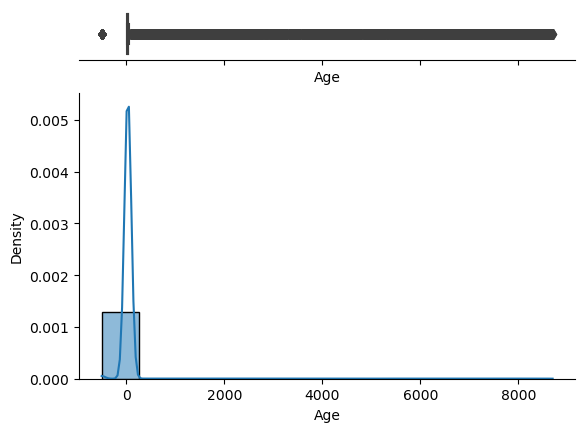

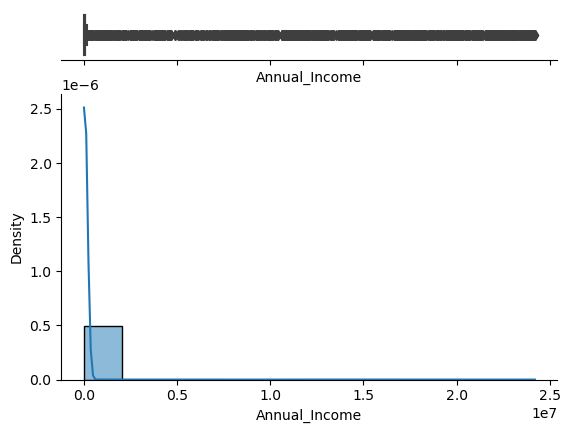

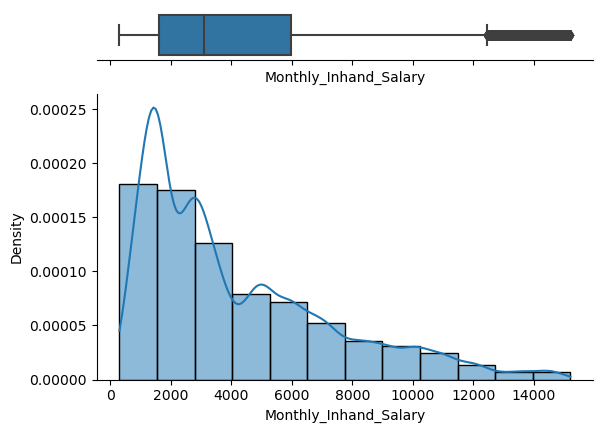

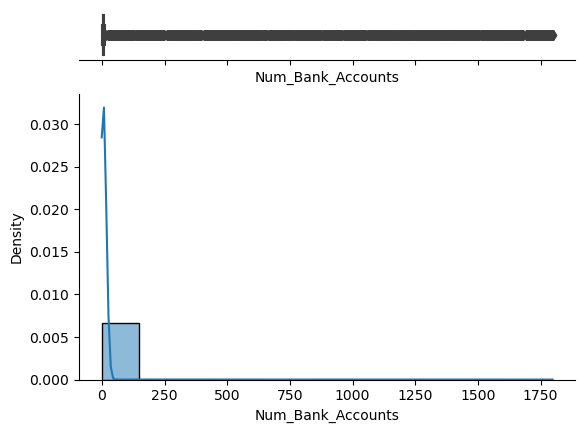

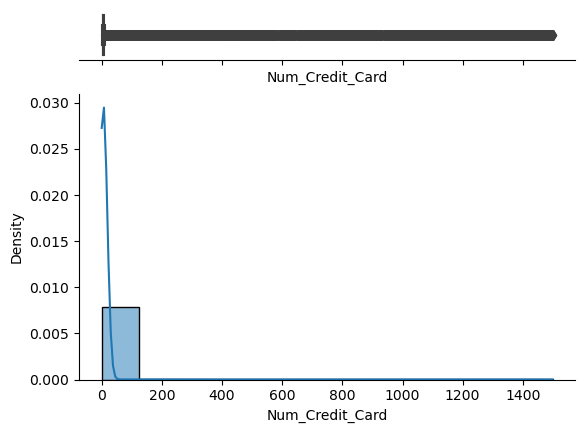

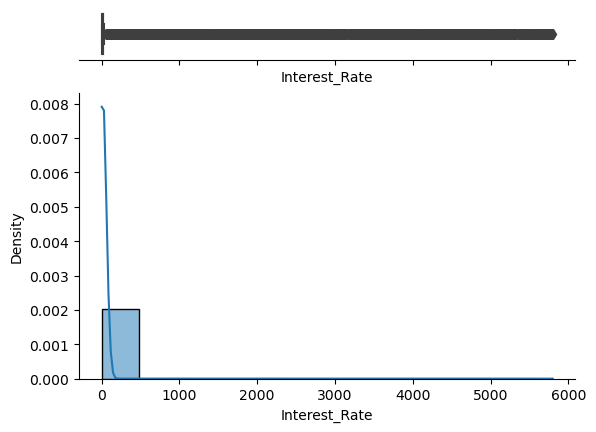

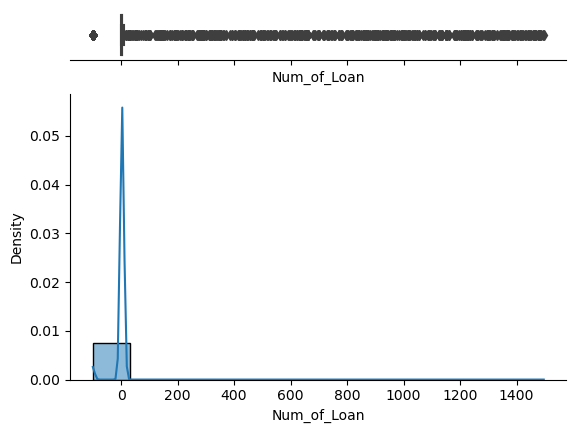

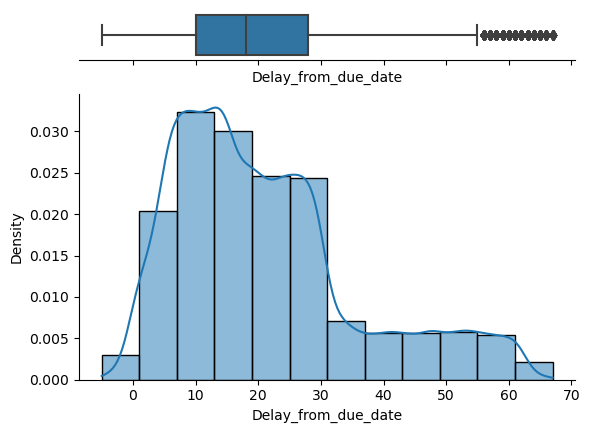

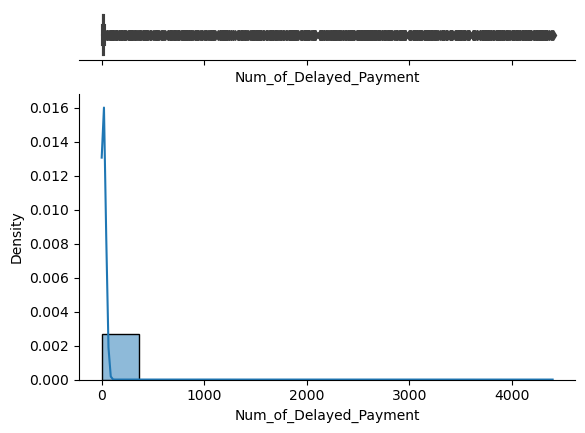

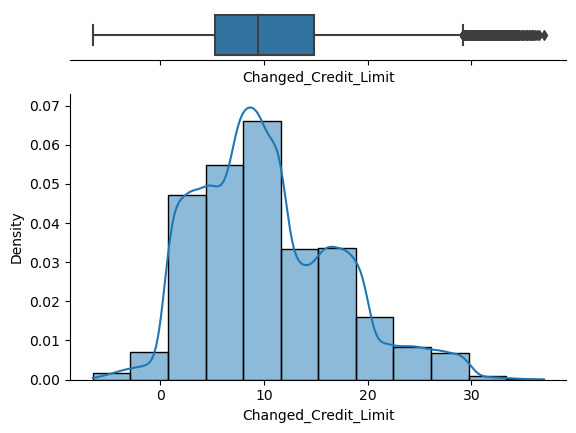

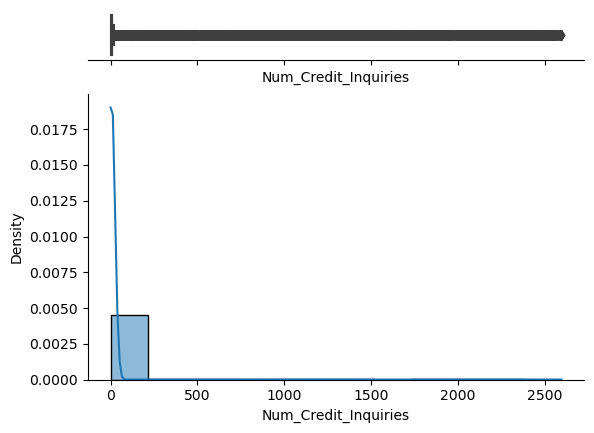

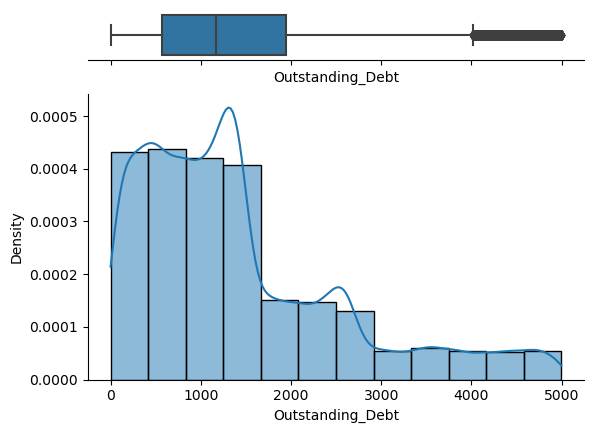

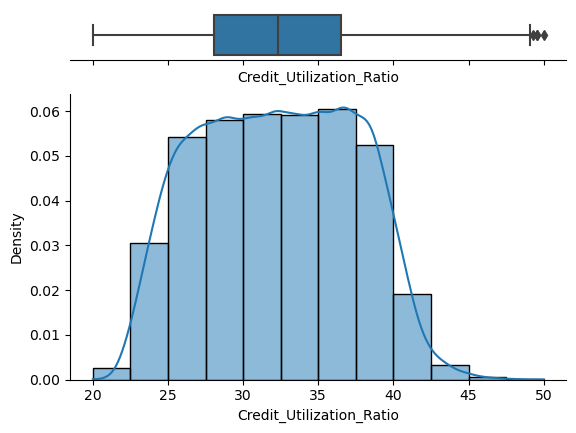

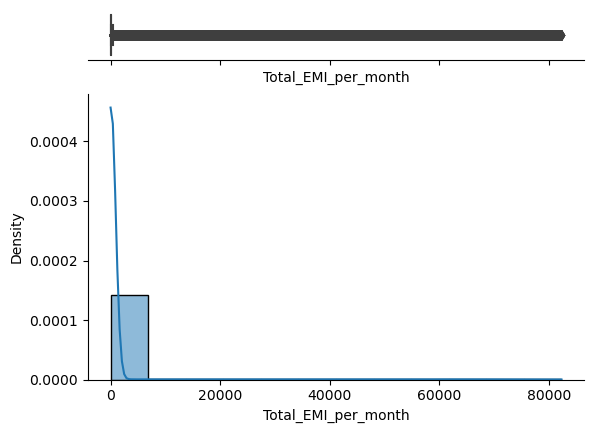

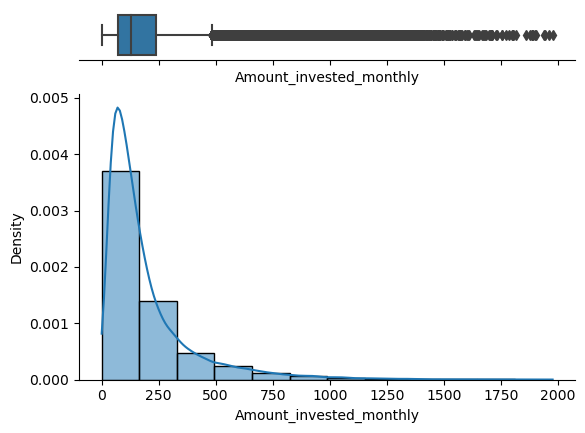

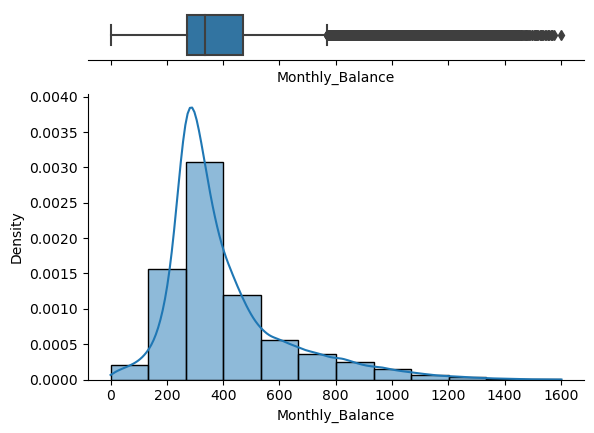

In [14]:
# Create subplots for each feature
for feature in ld_numericals:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=df[feature], ax=ax_box)
    sns.histplot(x=df[feature], bins=12, kde=True, stat='density', ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    plt.show()

### Remove _ in `Credit_Mix` Feature

In [15]:
# Checking _ inside `Credit Mix`
underscore_count = df['Credit_Mix'].str.count('_').sum()
Nan_CreditMix = df.Credit_Mix.isna().sum()

print("Total number of underscores in the 'Credit_Mix' column:", underscore_count)
print("Total NaN Values in the 'Credit_Mix' column:", Nan_CreditMix)

Total number of underscores in the 'Credit_Mix' column: 20195
Total NaN Values in the 'Credit_Mix' column: 0


In [16]:
df.Credit_Mix = df.Credit_Mix.replace('_', np.nan)

In [17]:
# Re-checking _ inside `Credit Mix`
underscore_count = df['Credit_Mix'].str.count('_').sum()
NaN_CreditMix = df.Credit_Mix.isna().sum()

print("Total number of underscores in the 'Credit_Mix' column:", underscore_count)
print("Total NaN Values in the 'Credit_Mix' column:", NaN_CreditMix)

Total number of underscores in the 'Credit_Mix' column: 0.0
Total NaN Values in the 'Credit_Mix' column: 20195


###  Cleaning & Re-write `Type_of_Loan`

In [18]:
df['Type_of_Loan'].head(1)

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object

In [19]:
NaN_TypeofLoan = df['Type_of_Loan'].isna().sum()
sample_NaN_TypeofLoan = df['Type_of_Loan'].head(1)

print("Total NaN Values in the 'Type of Loan' column:", NaN_TypeofLoan)
print("Value sample of 'Type of Loan' column:", sample_NaN_TypeofLoan)

Total NaN Values in the 'Type of Loan' column: 11408
Value sample of 'Type of Loan' column: 0    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object


In [20]:
# Remove the word "and" from the 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(', and', ',')

# New names with initials only
new_name = ['Auto_L', 'DebtCon_L', 'HomEq_L', 'CrBld_L', 'Pydy_L', 'NS', 'Stdnt_L', 'Mrtg_L', 'Prsnl_L']

# Create a dictionary to map the old names to new names
name_mapping = dict(zip(['Auto Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
                         'Credit-Builder Loan', 'Payday Loan', 'Not Specified',
                         'Student Loan', 'Mortgage Loan', 'Personal Loan'], new_name))

# Custom function to replace values with initials
def replace_with_initials(value):
    if pd.notna(value):
        loan_types = value.split(', ')
        initials = [name_mapping[loan_type.strip()] for loan_type in loan_types]
        return ', '.join(initials)
    else:
        return value

# Apply the custom function to 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(replace_with_initials)

# Replace 'NS' with nothing in the 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('NS', 'NaN')

In [21]:
NaN_TypeofLoan = df['Type_of_Loan'].isna().sum()
sample_NaN_TypeofLoan = df['Type_of_Loan'].head(1)

print("Total NaN Values in the 'Type of Loan' column:", NaN_TypeofLoan)
print("Value sample of 'Type of Loan' column:", sample_NaN_TypeofLoan)

Total NaN Values in the 'Type of Loan' column: 11408
Value sample of 'Type of Loan' column: 0    Auto_L, CrBld_L, Prsnl_L, HomEq_L
Name: Type_of_Loan, dtype: object


### Remove '!@9#%8' of `Payment_Behaviour`  

In [22]:
NaN_PaymentBehaviour = df['Payment_Behaviour'].isna().sum()

print("Total NaN Values in the 'Type of Loan' column:", NaN_PaymentBehaviour)

Total NaN Values in the 'Type of Loan' column: 0


In [23]:
# Checking _ inside `Payment_Behaviour`
df_temp_PayBeh_contain = df.copy()
df_temp_PayBeh_contain['PayBeh_contain'] = df['Payment_Behaviour'].astype(str).str.contains('!@9#%8')
df_temp_PayBeh_contain[df_temp_PayBeh_contain.PayBeh_contain].Payment_Behaviour.head(5)

5     !@9#%8
16    !@9#%8
32    !@9#%8
47    !@9#%8
54    !@9#%8
Name: Payment_Behaviour, dtype: object

In [24]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", np.nan)

In [25]:
NaN_PaymentBehaviour = df['Payment_Behaviour'].isna().sum()

print("Total NaN Values in the 'Type of Loan' column:", NaN_PaymentBehaviour)

Total NaN Values in the 'Type of Loan' column: 7600


### Determine Possible Range of Age in `Age`

To determine range of age I will use Age Group 18-23, 24-39, 40-55, 56-74, >75 years old  <br>
Source: https://www.forbes.com/advisor/credit-cards/how-do-you-measure-up-average-credit-score-by-age-and-location/

even though the verified oldest person (Jeanne Calment) in the world is 122 years, 164 days, <br>
(Source: https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people)

I took maximum Age of 100 for the upper limit <br>
(Source: https://www.visualcapitalist.com/the-worlds-population-2020-by-age/)

In [29]:
# Count the number of values in the 'Age' column within the range 18-100
num_values_within_range = df['Age'].between(18, 100).sum()

print("Number of values in 'Age' column within the range 18-100:", num_values_within_range)

Number of values in 'Age' column within the range 18-100: 86937


There are 91518 people in age of range 18-100 from 100000 people

In [30]:
df['Age'] = np.where((df['Age'] > 100) | (df['Age'] < 18), np.nan, df['Age'])

In [31]:
NaN_Age = df['Age'].isna().sum()

print("Total NaN Values in the 'Age' column:", NaN_Age)

### Remove Negative Value & Set Range of Num_of_Loan

In [32]:
# Count NaN, negative, min and max values
num_NaN = df['Num_of_Loan'].isna().sum()
num_negative_values = (df['Num_of_Loan'] < 0).sum()
min_value = df['Num_of_Loan'].min()
max_value = df['Num_of_Loan'].max()

print("Number of NaN in 'Num_of_Loan' column:", num_NaN)
print("Number of negative values in 'Num_of_Loan' column:", num_negative_values)
print("Min value of 'Num_of_Loan':", min_value)
print("Max value of 'Num_of_Loan':", max_value)

Number of NaN in 'Num_of_Loan' column: 4785
Number of negative values in 'Num_of_Loan' column: 3876
Min value of 'Num_of_Loan': -100.0
Max value of 'Num_of_Loan': 1496.0


In [33]:
# Remove negative value
df['Num_of_Loan'] = np.where((df['Num_of_Loan'] < 0), np.nan, df['Num_of_Loan'])

In [34]:
def calculate_outliers(data_frame, column_name):
    # Calculate quartiles
    q1 = data_frame[column_name].quantile(0.25)
    q3 = data_frame[column_name].quantile(0.75)

    # Calculate IQR
    iqr = q3 - q1

    # Calculate upper bounds
    upper_bound = q3 + 1.5 * iqr
    
    print(column_name)
    print("Upper Bound:", upper_bound)
    return

In [35]:
calculate_outliers(df, 'Num_of_Loan')

Num_of_Loan
Upper Bound: 9.5


Hence the range for number of loan is between 0 and 10.

In [36]:
# Range it into 0-10
df['Num_of_Loan'] = np.where((df['Num_of_Loan'] > 10), np.nan, df['Num_of_Loan'])

In [37]:
# Re-checking
num_NaN = df['Num_of_Loan'].isna().sum()
num_negative_values = (df['Num_of_Loan'] < 0).sum()
min_value = df['Num_of_Loan'].min()
max_value = df['Num_of_Loan'].max()

print("Number of NaN in 'Num_of_Loan' column:", num_NaN)
print("Number of negative values in 'Num_of_Loan' column:", num_negative_values)
print("Min value of 'Num_of_Loan':", min_value)
print("Max value of 'Num_of_Loan':", max_value)

Number of NaN in 'Num_of_Loan' column: 9108
Number of negative values in 'Num_of_Loan' column: 0
Min value of 'Num_of_Loan': 0.0
Max value of 'Num_of_Loan': 9.0


### Remove Negative Value & Set Range of Num_Credit_Card

In [38]:
# Count NaN, negative, min and max values
num_NaN = df['Num_Credit_Card'].isna().sum()
num_negative_values = (df['Num_Credit_Card'] < 0).sum()
min_value = df['Num_Credit_Card'].min()
max_value = df['Num_Credit_Card'].max()

print("Number of NaN in 'Num_Credit_Card' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Card' column:", num_negative_values)
print("Min value of 'Num_Credit_Card':", min_value)
print("Max value of 'Num_Credit_Card':", max_value)

Number of NaN in 'Num_Credit_Card' column: 0
Number of negative values in 'Num_Credit_Card' column: 0
Min value of 'Num_Credit_Card': 0
Max value of 'Num_Credit_Card': 1499


In [39]:
calculate_outliers(df, 'Num_Credit_Card')

Num_Credit_Card
Upper Bound: 11.5


Hence the range for number of credit card is between 0 and 12.

In [40]:
# Range it into 0-12
df['Num_Credit_Card'] = np.where((df['Num_Credit_Card'] > 12), np.nan, df['Num_Credit_Card'])

In [41]:
# Re-checking
num_NaN = df['Num_Credit_Card'].isna().sum()
num_negative_values = (df['Num_Credit_Card'] < 0).sum()
min_value = df['Num_Credit_Card'].min()
max_value = df['Num_Credit_Card'].max()

print("Number of NaN in 'Num_Credit_Card' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Card' column:", num_negative_values)
print("Min value of 'Num_Credit_Card':", min_value)
print("Max value of 'Num_Credit_Card':", max_value)

Number of NaN in 'Num_Credit_Card' column: 2271
Number of negative values in 'Num_Credit_Card' column: 0
Min value of 'Num_Credit_Card': 0.0
Max value of 'Num_Credit_Card': 11.0


### Set Range of `Num_of_Delayed_Payment`

In [42]:
# Count NaN, negative, min and max values
num_NaN = df['Num_of_Delayed_Payment'].isna().sum()
num_negative_values = (df['Num_of_Delayed_Payment'] < 0).sum()
min_value = df['Num_of_Delayed_Payment'].min()
max_value = df['Num_of_Delayed_Payment'].max()

print("Number of NaN in 'Num_of_Delayed_Payment' column:", num_NaN)
print("Number of negative values in 'Num_of_Delayed_Payment' column:", num_negative_values)
print("Min value of 'Num_of_Delayed_Payment':", min_value)
print("Max value of 'Num_of_Delayed_Payment':", max_value)

Number of NaN in 'Num_of_Delayed_Payment' column: 9746
Number of negative values in 'Num_of_Delayed_Payment' column: 622
Min value of 'Num_of_Delayed_Payment': -3.0
Max value of 'Num_of_Delayed_Payment': 4397.0


As mentioned before, maximum for number of loan is 10 and number of credit card is 12, hence possibly maximum number of delayed payment would be 22.

In [43]:
df['Num_of_Delayed_Payment'] = np.where((df['Num_of_Delayed_Payment'] > 22) | (df['Num_of_Delayed_Payment'] < 0), np.nan, df['Num_of_Delayed_Payment'])

In [44]:
# Count NaN, negative, min and max values
num_NaN = df['Num_of_Delayed_Payment'].isna().sum()
num_negative_values = (df['Num_of_Delayed_Payment'] < 0).sum()
min_value = df['Num_of_Delayed_Payment'].min()
max_value = df['Num_of_Delayed_Payment'].max()

print("Number of NaN in 'Num_of_Delayed_Payment' column:", num_NaN)
print("Number of negative values in 'Num_of_Delayed_Payment' column:", num_negative_values)
print("Min value of 'Num_of_Delayed_Payment':", min_value)
print("Max value of 'Num_of_Delayed_Payment':", max_value)

Number of NaN in 'Num_of_Delayed_Payment' column: 17001
Number of negative values in 'Num_of_Delayed_Payment' column: 0
Min value of 'Num_of_Delayed_Payment': 0.0
Max value of 'Num_of_Delayed_Payment': 22.0


### Set Range of `Interest Rate`

In [45]:
# Count NaN, negative, min and max values
num_NaN = df['Interest_Rate'].isna().sum()
num_negative_values = (df['Interest_Rate'] < 0).sum()
min_value = df['Interest_Rate'].min()
max_value = df['Interest_Rate'].max()

print("Number of NaN in 'Interest_Rate' column:", num_NaN)
print("Number of negative values in 'Interest_Rate' column:", num_negative_values)
print("Min value of 'Interest_Rate':", min_value)
print("Max value of 'Interest_Rate':", max_value)

Number of NaN in 'Interest_Rate' column: 0
Number of negative values in 'Interest_Rate' column: 0
Min value of 'Interest_Rate': 1
Max value of 'Interest_Rate': 5797


In [46]:
calculate_outliers(df, 'Interest_Rate')

Interest_Rate
Upper Bound: 38.0


Hence the range for number of credit card is between 0 and 38.

In [47]:
# Range it into 0-38
df['Interest_Rate'] = np.where((df['Interest_Rate'] > 38), np.nan, df['Interest_Rate'])

In [48]:
# Re-checking
num_NaN = df['Interest_Rate'].isna().sum()
num_negative_values = (df['Interest_Rate'] < 0).sum()
min_value = df['Interest_Rate'].min()
max_value = df['Interest_Rate'].max()

print("Number of NaN in 'Interest_Rate' column:", num_NaN)
print("Number of negative values in 'Interest_Rate' column:", num_negative_values)
print("Min value of 'Interest_Rate':", min_value)
print("Max value of 'Interest_Rate':", max_value)

Number of NaN in 'Interest_Rate' column: 2034
Number of negative values in 'Interest_Rate' column: 0
Min value of 'Interest_Rate': 1.0
Max value of 'Interest_Rate': 34.0


### Set Range of `Total_EMI_per_month`

In [49]:
# Count NaN, negative, min and max values
num_NaN = df['Total_EMI_per_month'].isna().sum()
num_negative_values = (df['Total_EMI_per_month'] < 0).sum()
min_value = df['Total_EMI_per_month'].min()
max_value = df['Total_EMI_per_month'].max()

print("Number of NaN in 'Total_EMI_per_month' column:", num_NaN)
print("Number of negative values in 'Total_EMI_per_month' column:", num_negative_values)
print("Min value of 'Total_EMI_per_month':", min_value)
print("Max value of 'Total_EMI_per_month':", max_value)

Number of NaN in 'Total_EMI_per_month' column: 0
Number of negative values in 'Total_EMI_per_month' column: 0
Min value of 'Total_EMI_per_month': 0.0
Max value of 'Total_EMI_per_month': 82331.0


In [50]:
calculate_outliers(df, 'Total_EMI_per_month')

Hence the range for total EMI per month is between 0 and 357.

In [ ]:
# Range it into 0-357
df['Total_EMI_per_month'] = np.where((df['Total_EMI_per_month'] > 357), np.nan, df['Total_EMI_per_month'])

In [52]:
# Re-checking
num_NaN = df['Total_EMI_per_month'].isna().sum()
num_negative_values = (df['Total_EMI_per_month'] < 0).sum()
min_value = df['Total_EMI_per_month'].min()
max_value = df['Total_EMI_per_month'].max()

print("Number of NaN in 'Total_EMI_per_month' column:", num_NaN)
print("Number of negative values in 'Total_EMI_per_month' column:", num_negative_values)
print("Min value of 'Total_EMI_per_month':", min_value)
print("Max value of 'Total_EMI_per_month':", max_value)

Number of NaN in 'Total_EMI_per_month' column: 6802
Number of negative values in 'Total_EMI_per_month' column: 0
Min value of 'Total_EMI_per_month': 0.0
Max value of 'Total_EMI_per_month': 356.9795430065876


### Set Range of `Interest Rate`

In [53]:
# Count NaN, negative, min and max values
num_NaN = df['Num_Credit_Inquiries'].isna().sum()
num_negative_values = (df['Num_Credit_Inquiries'] < 0).sum()
min_value = df['Num_Credit_Inquiries'].min()
max_value = df['Num_Credit_Inquiries'].max()

print("Number of NaN in 'Num_Credit_Inquiries' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Inquiries' column:", num_negative_values)
print("Min value of 'Num_Credit_Inquiries':", min_value)
print("Max value of 'Num_Credit_Inquiries':", max_value)

Number of NaN in 'Num_Credit_Inquiries' column: 1965
Number of negative values in 'Num_Credit_Inquiries' column: 0
Min value of 'Num_Credit_Inquiries': 0.0
Max value of 'Num_Credit_Inquiries': 2597.0


In [54]:
calculate_outliers(df, 'Num_Credit_Inquiries')

Num_Credit_Inquiries
Upper Bound: 18.0


Hence the range for number of number credit inquiries is between 0 and 18.

In [55]:
# Range it into 0-18
df['Num_Credit_Inquiries'] = np.where((df['Num_Credit_Inquiries'] > 18), np.nan, df['Num_Credit_Inquiries'])

In [56]:
# Re-checking
num_NaN = df['Num_Credit_Inquiries'].isna().sum()
num_negative_values = (df['Num_Credit_Inquiries'] < 0).sum()
min_value = df['Num_Credit_Inquiries'].min()
max_value = df['Num_Credit_Inquiries'].max()

print("Number of NaN in 'Num_Credit_Inquiries' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Inquiries' column:", num_negative_values)
print("Min value of 'Num_Credit_Inquiries':", min_value)
print("Max value of 'Num_Credit_Inquiries':", max_value)

Number of NaN in 'Num_Credit_Inquiries' column: 3615
Number of negative values in 'Num_Credit_Inquiries' column: 0
Min value of 'Num_Credit_Inquiries': 0.0
Max value of 'Num_Credit_Inquiries': 17.0


### Set Range of `Num_Bank_Accounts`

In [57]:
# Count NaN, negative, min and max values
num_NaN = df['Num_Bank_Accounts'].isna().sum()
num_negative_values = (df['Num_Bank_Accounts'] < 0).sum()
min_value = df['Num_Bank_Accounts'].min()
max_value = df['Num_Bank_Accounts'].max()

print("Number of NaN in 'Num_Bank_Accounts' column:", num_NaN)
print("Number of negative values in 'Num_Bank_Accounts' column:", num_negative_values)
print("Min value of 'Num_Bank_Accounts':", min_value)
print("Max value of 'Num_Bank_Accounts':", max_value)

Number of NaN in 'Num_Bank_Accounts' column: 0
Number of negative values in 'Num_Bank_Accounts' column: 21
Min value of 'Num_Bank_Accounts': -1
Max value of 'Num_Bank_Accounts': 1798


In [58]:
calculate_outliers(df, 'Num_Bank_Accounts')

Num_Bank_Accounts
Upper Bound: 13.0


Hence the range for number of bank accounts is between 0 and 13.

In [59]:
# Range it into 0-13
df['Num_Bank_Accounts'] = np.where((df['Num_Bank_Accounts'] > 13) | (df['Num_Bank_Accounts'] < 0), np.nan, df['Num_Bank_Accounts'])

In [60]:
# Re-checking
num_NaN = df['Num_Bank_Accounts'].isna().sum()
num_negative_values = (df['Num_Bank_Accounts'] < 0).sum()
min_value = df['Num_Bank_Accounts'].min()
max_value = df['Num_Bank_Accounts'].max()

print("Number of NaN in 'Num_Bank_Accounts' column:", num_NaN)
print("Number of negative values in 'Num_Bank_Accounts' column:", num_negative_values)
print("Min value of 'Num_Bank_Accounts':", min_value)
print("Max value of 'Num_Bank_Accounts':", max_value)

Number of NaN in 'Num_Bank_Accounts' column: 1336
Number of negative values in 'Num_Bank_Accounts' column: 0
Min value of 'Num_Bank_Accounts': 0.0
Max value of 'Num_Bank_Accounts': 11.0


### Set Range of `Annual_Income`

In [61]:
# Count NaN, negative, min and max values
num_NaN = df['Annual_Income'].isna().sum()
num_negative_values = (df['Annual_Income'] < 0).sum()
min_value = df['Annual_Income'].min()
max_value = df['Annual_Income'].max()

print("Number of NaN in 'Annual_Income' column:", num_NaN)
print("Number of negative values in 'Annual_Income' column:", num_negative_values)
print("Min value of 'Annual_Income':", min_value)
print("Max value of 'Annual_Income':", max_value)

Number of NaN in 'Annual_Income' column: 6980
Number of negative values in 'Annual_Income' column: 0
Min value of 'Annual_Income': 7005.93
Max value of 'Annual_Income': 24198062.0


In [62]:
calculate_outliers(df, 'Annual_Income')

Annual_Income
Upper Bound: 152955.05000000002


"In terms of individual income, rather than household income, the top 1% earns 357,552 USD" <br>
Source: https://www.creditkarma.com/insights/i/average-american-income#how-much-income-does-the-top-1%-of-households-earn <br>

The maximum annual income on data is 24,198,062 USD, and the upper bound is 152,955 USD, but I took 357,552 USD as the upper bound for American individual income based on source above.

In [63]:
# Range it into 0-357552
df['Annual_Income'] = np.where((df['Annual_Income'] > 357552), np.nan, df['Annual_Income'])

In [64]:
# Re-checking
num_NaN = df['Annual_Income'].isna().sum()
num_negative_values = (df['Annual_Income'] < 0).sum()
min_value = df['Annual_Income'].min()
max_value = df['Annual_Income'].max()

print("Number of NaN in 'Annual_Income' column:", num_NaN)
print("Number of negative values in 'Annual_Income' column:", num_negative_values)
print("Min value of 'Annual_Income':", min_value)
print("Max value of 'Annual_Income':", max_value)

Number of NaN in 'Annual_Income' column: 7921
Number of negative values in 'Annual_Income' column: 0
Min value of 'Annual_Income': 7005.93
Max value of 'Annual_Income': 344983.0


### Converting `Credit_History_Age` format into Months

In [65]:
num_NaN = df['Credit_History_Age'].isna().sum()
print("Number of NaN in 'Credit_History_Age' column:", num_NaN)

Number of NaN in 'Credit_History_Age' column: 9030


In [66]:
# Function to convert years and months to months
def convert_to_months(entry):
    if pd.notna(entry):
        match = re.match(r'(\d+) Years and (\d+) Months', entry)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            return years * 12 + months
    return np.nan

In [67]:
df['Credit_History_months'] = df['Credit_History_Age'].apply(convert_to_months)

In [68]:
num_NaN = df['Credit_History_months'].isna().sum()
print("Number of NaN in 'Credit_History_months' column:", num_NaN)

Number of NaN in 'Credit_History_months' column: 9030


In [69]:
# Drop the 'Credit_History_Age' column
df = df.drop('Credit_History_Age', axis=1)

### Remove negative value of `Delay_from_due_date`

In [70]:
# Count the negative values
num_negative_values = (df['Delay_from_due_date'] < 0).sum()
min_value = df['Delay_from_due_date'].min()
max_value = df['Delay_from_due_date'].max()

print("Number of negative values in 'Delay_from_due_date' column:", num_negative_values)
print("Min value of 'Delay_from_due_date':", min_value)
print("Max value of 'Delay_from_due_date':", max_value)

Number of negative values in 'Delay_from_due_date' column: 591
Min value of 'Delay_from_due_date': -5
Max value of 'Delay_from_due_date': 67


Typically, creditors report late payments in one of these categories:
* 30-days late
* 60-days late
* 90-days late
* 120-days late
* 150-days late
* Charge off (written off as a loss because of severe delinquency) <br>
Since it still in range (0-67), hence there's no outliers <br>
Source: https://www.myfico.com/credit-education/faq/negative-reasons/late-payments

In [71]:
# Count negative value
num_negative_values = (df['Delay_from_due_date'] < 0).sum()

print("Number of negative values in 'Delay_from_due_date' column:", num_negative_values)

Number of negative values in 'Delay_from_due_date' column: 591


In [72]:
# Exclude negative value
df['Delay_from_due_date'] = np.where((df['Delay_from_due_date'] < 0), np.nan, df['Delay_from_due_date'])

In [73]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,NaN,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378.0
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,379.0
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,380.0
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,381.0


In [74]:
# Re-checking negative value
num_negative_values = (df['Delay_from_due_date'] < 0).sum()

print("Number of negative values in 'Delay_from_due_date' column:", num_negative_values)

Number of negative values in 'Delay_from_due_date' column: 0


### Drop _______ in `Occupation`

In [75]:
# Checking _______ inside `Occupation`
underscore_count = df['Occupation'].str.count('_______').sum()
num_NaN = df['Occupation'].isna().sum()

print("Total number of underscores in the 'Occupation' column:", underscore_count)
print("Number of NaN in 'Occupation' column:", num_NaN)

Total number of underscores in the 'Occupation' column: 7062
Number of NaN in 'Occupation' column: 0


In [76]:
# Drop rows with a specific value in the "Occupation" column
df['Occupation']= df['Occupation'].replace("_______",np.nan)
df['Occupation']= df['Occupation'].replace("NS",np.nan)

In [77]:
# Re-Checking _______ inside `Occupation`
underscore_count = df['Occupation'].str.count('_______').sum()
num_NaN = df['Occupation'].isna().sum()

print("Total number of underscores in the 'Occupation' column:", underscore_count)
print("Number of NaN in 'Occupation' column:", num_NaN)

Total number of underscores in the 'Occupation' column: 0.0
Number of NaN in 'Occupation' column: 7062


### Drop NM in `Payment_of_Min_Amount`

In [78]:
# Checking NM inside `Payment_of_Min_Amount`
underscore_count = df['Payment_of_Min_Amount'].str.count('NM').sum()
num_NaN = df['Payment_of_Min_Amount'].isna().sum()

print("Total number of underscores in the 'Payment_of_Min_Amount' column:", underscore_count)
print("Number of NaN in 'Payment_of_Min_Amount' column:", num_NaN)

Total number of underscores in the 'Payment_of_Min_Amount' column: 12007
Number of NaN in 'Payment_of_Min_Amount' column: 0


In [79]:
df.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)

In [80]:
# Re-Checking NM inside `Payment_of_Min_Amount`
underscore_count = df['Payment_of_Min_Amount'].str.count('NM').sum()
num_NaN = df['Payment_of_Min_Amount'].isna().sum()

print("Total number of underscores in the 'Payment_of_Min_Amount' column:", underscore_count)
print("Number of NaN in 'Payment_of_Min_Amount' column:", num_NaN)

Total number of underscores in the 'Payment_of_Min_Amount' column: 0.0
Number of NaN in 'Payment_of_Min_Amount' column: 12007


## Advanced Handling Missing Values

In [81]:
# Calculate missing percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame from missing_percentage
missing_df = pd.DataFrame({'MissingPercentage': missing_percentage})

# Add a new column for data types
missing_df['DataType'] = df.dtypes

missing_df.sort_values(by='MissingPercentage', ascending=False)

,MissingPercentage,DataType
Credit_Mix,20.195,object
Num_of_Delayed_Payment,17.001,float64
Monthly_Inhand_Salary,15.002,float64
Age,13.063,float64
Payment_of_Min_Amount,12.007,object
Type_of_Loan,11.408,object
Name,9.985,object
Num_of_Loan,9.108,float64
Credit_History_months,9.030,float64
Amount_invested_monthly,8.784,float64


In [82]:
# Drop Unnecessary Features
df.drop(['ID', 'Customer_ID'], axis=1, inplace=True)

In [83]:
ld_numericals

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [84]:
# Numerical Columns (float64)
numerical_cols = [
    'Num_of_Delayed_Payment', 'Monthly_Inhand_Salary', 'Age', 'Num_of_Loan',
    'Amount_invested_monthly', 'Annual_Income', 'Total_EMI_per_month',
    'Num_Credit_Inquiries', 'Num_Credit_Card', 'Changed_Credit_Limit',
    'Interest_Rate', 'Num_Bank_Accounts', 'Monthly_Balance', 'Outstanding_Debt',
    'Delay_from_due_date', 'Credit_Utilization_Ratio', 'Credit_History_months'
]

# Categorical Columns (object)
categorical_cols = [
    'Credit_Mix', 'Type_of_Loan', 'Name', 'Payment_Behaviour', 'Occupation', 'Payment_of_Min_Amount'
]

# Mean/Median Imputation for Numerical Columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Mode Imputation for Categorical Columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [85]:
df.isna().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_History_months       0
dtype: int64

## Handling Duplicate Values

In [86]:
#Show amount of missing value
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


# Feature Engineering

## Encoding

### Label Encoding in `Credit_Mix` Feature

In [87]:
df_model = df.copy()
map = {"Bad":0, "Standard":1, "Good":2, "_":np.nan}

df_model['Credit_Mix'] = df_model['Credit_Mix'].map(map)

### One-Hot-Encoding of `Payment_Behaviour` 

In [90]:
df_model = pd.get_dummies(df_model, columns=['Payment_Behaviour'], prefix='Behaviour')

### Divide & Encoding `Type_of_Loan`

In [92]:
# Split the comma-separated categories and create binary columns
encoded_df = df_model["Type_of_Loan"].str.get_dummies(", ")

# Concatenate the original DataFrame with the encoded columns
df_model = pd.concat([df_model, encoded_df], axis=1)

# Drop the original "Loan_Type" column
df_model = df_model.drop(columns=["Type_of_Loan"])

In [96]:
df_model.drop(columns=['NaN'], inplace=True)

### Label Encoding `Month`

In [97]:
# Define a dictionary to map month names to labels
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8
}

# Apply the mapping to create a new column with labels
df_model["Month"] = df_model["Month"].map(month_mapping)

In [98]:
df_model["Month"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

### One-Hot Encoding `Occupation`

In [101]:
df_model["Occupation"].unique()

array(['Scientist', 'Lawyer', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [102]:
# Split the comma-separated categories and create binary columns
onehot_df = df_model["Occupation"].str.get_dummies(", ")

# Concatenate the original DataFrame with the encoded columns
df_model = pd.concat([df_model, onehot_df], axis=1)

# Drop the original "Loan_Type" column
df_model = df_model.drop(columns=["Occupation"])

### Label Encoding `Payment_of_Min_Amount`

In [104]:
# Define a dictionary to map month names to labels
Min_Amount_mapping = {
    "No": 0,
    "Yes": 1
}

# Apply the mapping to create a new column with labels
df_model["Payment_of_Min_Amount"] = df_model["Payment_of_Min_Amount"].map(Min_Amount_mapping)

### Ordinal Encoding for Target Variable `Credit_Score`

In [105]:
maplist = {
    "Poor": 0,
    "Standard": 1,
    "Good": 2
}

# Map the custom mapping to the "Education" column
df_model["Credit_Score"] = df_model["Credit_Score"].map(maplist)

ord_enc = OrdinalEncoder()
df_model["Credit_Score"] = ord_enc.fit_transform(df_model[["Credit_Score"]])
df_model["Credit_Score"] = df_model['Credit_Score'].astype(int)

df_model.Credit_Score

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

# Feature Selection

In [106]:
# Create a list to store not important features
not_important_features = []

# Create a contingency table for each categorical column
for col in df_model.columns:
    contingency_table = pd.crosstab(df_model[col], df_model['Credit_Score'])
    # Apply the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print('-'*15)
    
    # Check if the p-value is greater than 0.05
    if p > 0.05:
        not_important_features.append(col)

Chi-square test results for Month:
Chi-square statistic: 201.80530639299857
P-value: 2.349409913674008e-35
Degrees of freedom: 14
---------------
Chi-square test results for Name:
Chi-square statistic: 98979.96664482032
P-value: 0.0
Degrees of freedom: 20276
---------------
Chi-square test results for Age:
Chi-square statistic: 3730.7443624107846
P-value: 0.0
Degrees of freedom: 84
---------------
Chi-square test results for SSN:
Chi-square statistic: 126897.831262426
P-value: 0.0
Degrees of freedom: 25000
---------------
Chi-square test results for Annual_Income:
Chi-square statistic: 123677.80497769186
P-value: 0.0
Degrees of freedom: 24992
---------------
Chi-square test results for Monthly_Inhand_Salary:
Chi-square statistic: 116564.80446605897
P-value: 0.0
Degrees of freedom: 26470
---------------
Chi-square test results for Num_Bank_Accounts:
Chi-square statistic: 20603.95635784955
P-value: 0.0
Degrees of freedom: 24
---------------
Chi-square test results for Num_Credit_Card:
Ch

In [107]:
# Print the not important features
print("Columns with p-value > 0.05:", not_important_features)

Columns with p-value > 0.05: ['Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Monthly_Balance', 'Behaviour_Low_spent_Large_value_payments', 'Accountant', 'Developer', 'Manager', 'Musician']


## Drop Some Features

As the description of `Credit_Mix` that are not match with the value inside of it, then I drop it.

In [108]:
df_model = df_model.drop(['Credit_Utilization_Ratio', 'Amount_invested_monthly',
                          'Monthly_Balance'], axis=1)

In [109]:
df_model = df_model.drop(['Name', 'Credit_Mix', 'SSN'], axis=1)

## Checking Multicollinearity 

*In case forgot*
Y = W0+W1*X1+W2*X2 (Apply on linear algo)<br>

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2, and we would not be able to see their individual effect on Y. <br>
Source: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Although%20correlation%20matrix%20and%20scatter,a%20group%20of%20other%20variables.

In [133]:
correlation_matrix = df_model.corr()

In [154]:
correlation_matrix

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Mechanic,Media_Manager,Scientist,Teacher,Writer
Month,1.000000e+00,0.011765,0.001035,-0.002639,-0.000436,-0.000253,0.000156,-0.001711,0.000574,0.002671,...,-0.000922,-0.000143,0.000508,0.000173,0.001787,-0.000351,0.000108,-0.000422,-0.000353,-0.000844
Age,1.176453e-02,1.000000,0.060401,0.056114,-0.142829,-0.108118,-0.158887,-0.151524,-0.126071,-0.107194,...,-0.003929,-0.018137,0.003909,0.007592,0.008798,0.006044,-0.002935,0.003482,-0.009980,-0.001114
Annual_Income,1.034983e-03,0.060401,1.000000,0.878663,-0.270230,-0.206235,-0.285726,-0.233874,-0.236880,-0.235544,...,-0.005078,0.000996,0.003034,-0.011964,-0.006431,-0.001944,0.003021,0.005083,-0.006323,0.001549
Monthly_Inhand_Salary,-2.639166e-03,0.056114,0.878663,1.000000,-0.257747,-0.198735,-0.275336,-0.223917,-0.228148,-0.225597,...,-0.006363,0.004363,0.003077,-0.014182,-0.004880,-0.003090,0.002653,0.005420,-0.005141,0.003535
Num_Bank_Accounts,-4.361168e-04,-0.142829,-0.270230,-0.257747,1.000000,0.435371,0.574139,0.447692,0.550674,0.504197,...,0.000987,0.002151,0.002113,0.001060,-0.010290,0.005779,-0.011258,0.007182,-0.001799,0.013868
Num_Credit_Card,-2.532986e-04,-0.108118,-0.206235,-0.198735,0.435371,1.000000,0.486838,0.394608,0.471076,0.330095,...,-0.006017,-0.000297,0.005244,0.005418,-0.002906,-0.007596,0.002107,-0.004093,0.011627,0.005100
Interest_Rate,1.561500e-04,-0.158887,-0.285726,-0.275336,0.574139,0.486838,1.000000,0.528553,0.578620,0.457294,...,-0.002732,0.005353,0.000005,-0.000873,0.000464,0.007852,-0.006754,-0.008227,-0.000565,0.005352
Num_of_Loan,-1.711351e-03,-0.151524,-0.233874,-0.223917,0.447692,0.394608,0.528553,1.000000,0.475987,0.343861,...,0.014520,0.002546,0.011159,-0.011177,-0.009297,0.007200,-0.008864,0.006793,-0.003462,0.000237
Delay_from_due_date,5.740573e-04,-0.126071,-0.236880,-0.228148,0.550674,0.471076,0.578620,0.475987,1.000000,0.418339,...,-0.004509,0.010945,0.001410,-0.014019,-0.004251,0.004059,-0.000931,-0.000369,0.012116,0.001091
Num_of_Delayed_Payment,2.670660e-03,-0.107194,-0.235544,-0.225597,0.504197,0.330095,0.457294,0.343861,0.418339,1.000000,...,0.002844,-0.006499,0.002344,0.004387,-0.008296,-0.001567,-0.000021,0.006977,-0.009917,-0.004056


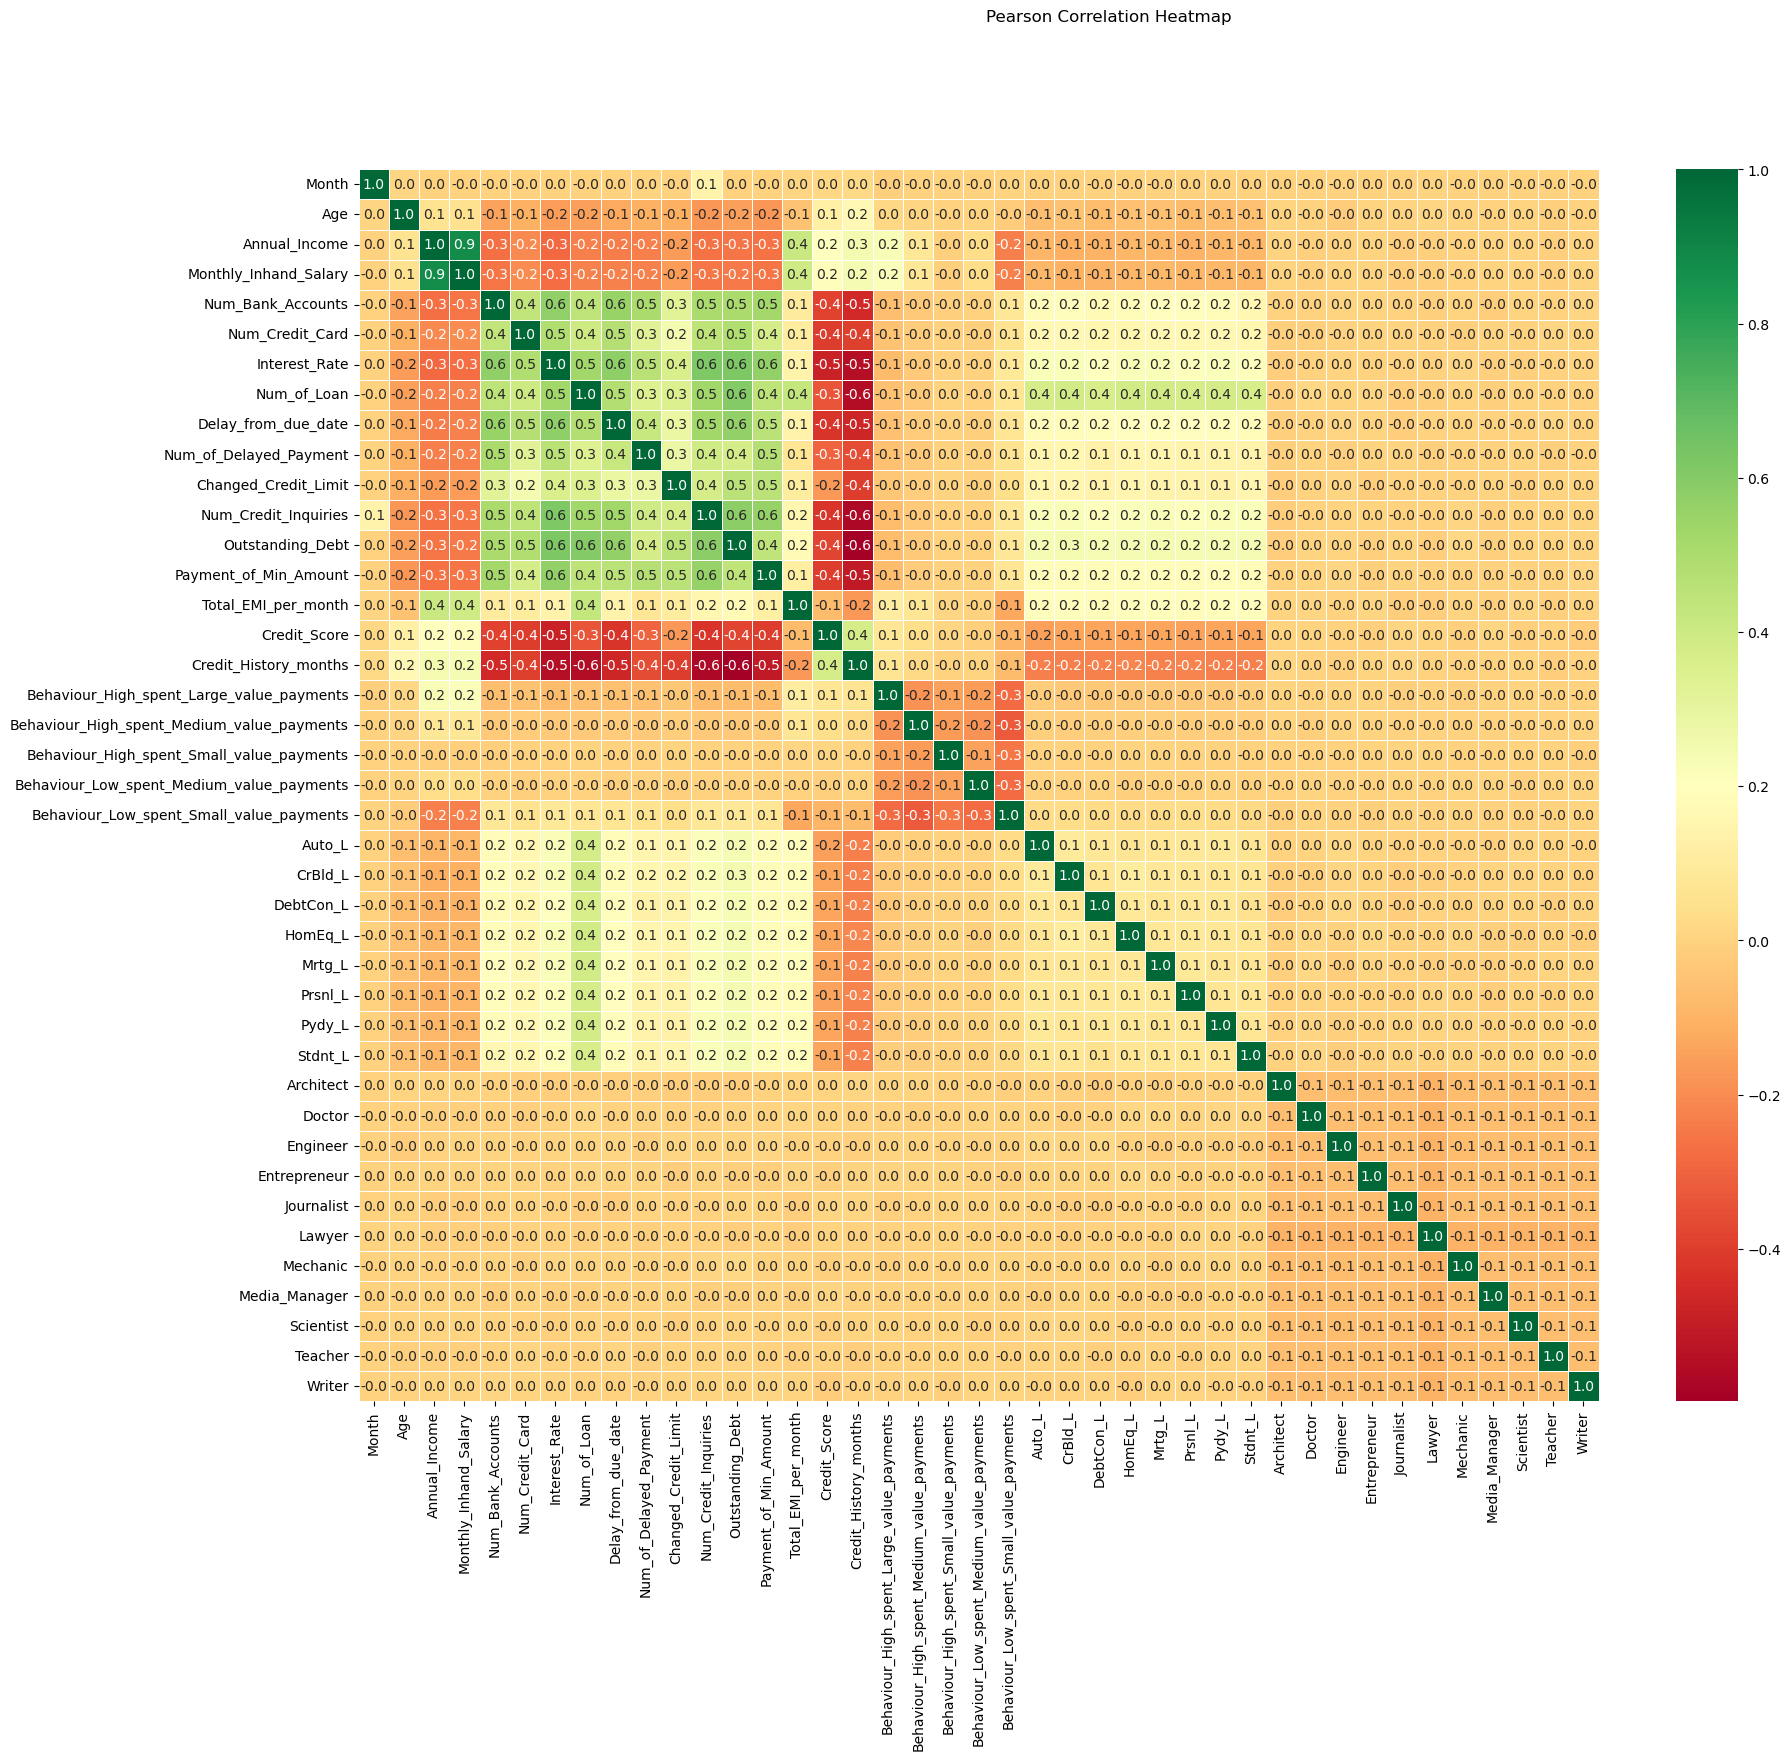

In [153]:
plt.figure(figsize = (20, 16))
sns.heatmap(correlation_matrix, cmap="RdYlGn", annot=True, fmt='.1f', linewidths = .5)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

In [135]:
# Define a threshold value for correlation
threshold = 0.5

# Find values greater than the threshold
high_correlation_pairs = np.where((np.abs(correlation_matrix) > threshold) & (correlation_matrix != 1))

# Create a DataFrame to display the pairs of variables with high correlation
high_correlation_df = pd.DataFrame({
    'Variable_1': correlation_matrix.columns[high_correlation_pairs[0]],
    'Variable_2': correlation_matrix.columns[high_correlation_pairs[1]],
    'Correlation Value': correlation_matrix.values[high_correlation_pairs]
})

# Sort the pairs lexicographically to handle duplicates
high_correlation_df[['Variable_1', 'Variable_2']] = np.sort(high_correlation_df[['Variable_1', 'Variable_2']], axis=1)

# Drop duplicate pairs
high_correlation_df.drop_duplicates(subset=['Variable_1', 'Variable_2'], inplace=True)

# Display the DataFrame with high correlation pairs without duplicates
high_correlation_df

,Variable_1,Variable_2,Correlation Value
0,Annual_Income,Monthly_Inhand_Salary,0.878663
2,Interest_Rate,Num_Bank_Accounts,0.574139
3,Delay_from_due_date,Num_Bank_Accounts,0.550674
4,Num_Bank_Accounts,Num_of_Delayed_Payment,0.504197
5,Num_Bank_Accounts,Num_Credit_Inquiries,0.505445
6,Num_Bank_Accounts,Outstanding_Debt,0.501173
7,Num_Bank_Accounts,Payment_of_Min_Amount,0.523002
9,Interest_Rate,Num_of_Loan,0.528553
10,Delay_from_due_date,Interest_Rate,0.578620
11,Interest_Rate,Num_Credit_Inquiries,0.614963


In [145]:
# Find the unique values in Variable_1 and Variable_2
unique_values_variable_1 = set(high_correlation_df['Variable_1'].unique())
unique_values_variable_2 = set(high_correlation_df['Variable_2'].unique())

# Sum both unique sets and convert to a list
combined_list = list(unique_values_variable_1) + list(unique_values_variable_2)

# Convert the list to a set to remove duplicates, then back to a list
unique_list = list(set(combined_list))

# Print the unique values
print(unique_list)

['Payment_of_Min_Amount', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Annual_Income', 'Delay_from_due_date', 'Interest_Rate', 'Num_Bank_Accounts', 'Num_of_Loan', 'Monthly_Inhand_Salary', 'Credit_History_months', 'Num_of_Delayed_Payment']


Since there are indicating multicollinearity on 'Payment_of_Min_Amount', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Annual_Income', 'Delay_from_due_date', 'Interest_Rate', 'Num_Bank_Accounts', 'Num_of_Loan', 'Monthly_Inhand_Salary', 'Credit_History_months', 'Num_of_Delayed_Payment', then to make sure I look further using VIF score.

In [152]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Add 'Credit_Score' to the list
unique_list.append('Credit_Score')

selected_features = df_model[unique_list]

X = add_constant(selected_features)

vif_df = pd.DataFrame([vif(X.values, i)for i in range(X.shape[1])],
                      index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Payment_of_Min_Amount,1.892803
2,Num_Credit_Inquiries,2.146212
3,Outstanding_Debt,2.314177
4,Annual_Income,4.451733
5,Delay_from_due_date,1.913310
6,Interest_Rate,2.430618
7,Num_Bank_Accounts,1.933577
8,Num_of_Loan,1.855017
9,Monthly_Inhand_Salary,4.404463
10,Credit_History_months,1.959918


There is no high VIF score above 5, hence there is no feature that need to drop

# Scaling Data

In [155]:
# Assume df is your original DataFrame
columns_to_exclude = ['Credit_Score']
selected_columns = [col for col in df_model.columns if col not in columns_to_exclude]

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_model = df_model.copy()
scaled_model[selected_columns] = scaler.fit_transform(df_model[selected_columns])

# Print the scaled DataFrame
scaled_model.head(3)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Mechanic,Media_Manager,Scientist,Teacher,Writer
0,0.000000,0.060976,0.035825,0.102087,0.272727,0.363636,0.060606,0.444444,0.044776,0.318182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.142857,0.060976,0.035825,0.261092,0.272727,0.363636,0.060606,0.444444,0.316526,0.575107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.285714,0.200322,0.035825,0.261092,0.272727,0.363636,0.060606,0.444444,0.044776,0.318182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Splitting & Oversampling Target Variable

In [156]:
target = scaled_model['Credit_Score'].value_counts().reset_index()
target.rename(columns={'index':'Credit_Score','Credit_Score':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Credit_Score,freq,percentage
0,1,53174,53.17
1,0,28998,29.00
2,2,17828,17.83


In [157]:
# Splitting dataset first
X = scaled_model.drop(columns=['Credit_Score'])
y = scaled_model.Credit_Score

In [158]:
# Split Train Test
X_train_im, X_test, y_train_im, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [159]:
print(y.value_counts())
print(y_train_im.value_counts())
print(y_test.value_counts())

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64
1    42610
0    23131
2    14259
Name: Credit_Score, dtype: int64
1    10564
0     5867
2     3569
Name: Credit_Score, dtype: int64


In [160]:
# Overampling with smote
X_train, y_train = SMOTE().fit_resample(X_train_im, y_train_im)

In [161]:
y_train.value_counts()

0    42610
1    42610
2    42610
Name: Credit_Score, dtype: int64

# Modeling

## Define Base Model

In [162]:
# Logistic Regression
LogReg = LogisticRegression(max_iter=1000, random_state=33)

In [166]:
# KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [164]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=33)

In [167]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=33)

In [168]:
# Create a Extreme Gradient Boosting Classifier object
xgb_clf = xgb.XGBClassifier(random_state=33)

In [169]:
# Create a Light Gradient Boosting Classifier object
lgb_clf = lgb.LGBMClassifier(random_state=33)

## Evaluation Base Model

In [170]:
# Define classier to a list
classifiers = [LogReg, knn_clf, dt_clf, rf_clf, xgb_clf, lgb_clf]

# Initialize Dict
results_train = []
results_test = []

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=33)

for classifier in classifiers:
    method = str(type(classifier)).split('.')[-1][:-2]

    # Perform cross-validation on training data
    accuracy_scores_train = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    precision_scores_train = cross_val_score(classifier, X_train, y_train, cv=kf, scoring=make_scorer(precision_score, average='macro'))
    recall_scores_train = cross_val_score(classifier, X_train, y_train, cv=kf, scoring=make_scorer(recall_score, average='macro'))
    f1_scores_train = cross_val_score(classifier, X_train, y_train, cv=kf, scoring=make_scorer(f1_score, average='macro'))

    # Train the model on the full training data
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    # Calculate metrics on training and test data
    acc_train = accuracy_score(y_train, y_pred_train)
    pre_train = precision_score(y_train, y_pred_train, average='macro')
    re_train = recall_score(y_train, y_pred_train, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')

    acc_test = accuracy_score(y_test, y_pred_test)
    pre_test = precision_score(y_test, y_pred_test, average='macro')
    re_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    # Append scores to results lists
    results_train.append({
        'Method': method,
        'accuracy': acc_train,
        'precision': pre_train,
        'recall': re_train,
        'f1-score': f1_train
    })

    results_test.append({
        'Method': method,
        'accuracy': acc_test,
        'precision': pre_test,
        'recall': re_test,
        'f1-score': f1_test
    })

# Create DataFrames from the results lists
model_performance_train = pd.DataFrame(results_train)
model_performance_test = pd.DataFrame(results_test)

In [171]:
# Rename the columns for precision, recall, and f1-score to distinguish between train and test
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

for metric in metrics:
    model_performance_train.rename(columns={metric: f'{metric}_train'}, inplace=True)
    model_performance_test.rename(columns={metric: f'{metric}_test'}, inplace=True)

# Merge the dataframes based on the 'Method' column
combined_data = pd.merge(model_performance_train, model_performance_test, on='Method', suffixes=('_train', '_test'))

# Define the desired column order
desired_column_order = [
    'Method',
    'accuracy_train', 'accuracy_test',
    'precision_train', 'precision_test',
    'recall_train', 'recall_test',
    'f1-score_train', 'f1-score_test'
]

# Reassign columns in the desired order
sorted_data = combined_data[desired_column_order]

In [172]:
# Subset of columns for coloring
subset_columns = sorted_data.columns[1:]

# Create a colormap with red and green hues
cmap = sns.color_palette("RdYlGn", as_cmap=True)

# Apply a background gradient to the DataFrame
styled_df = sorted_data.style.background_gradient(cmap=cmap, subset=subset_columns)

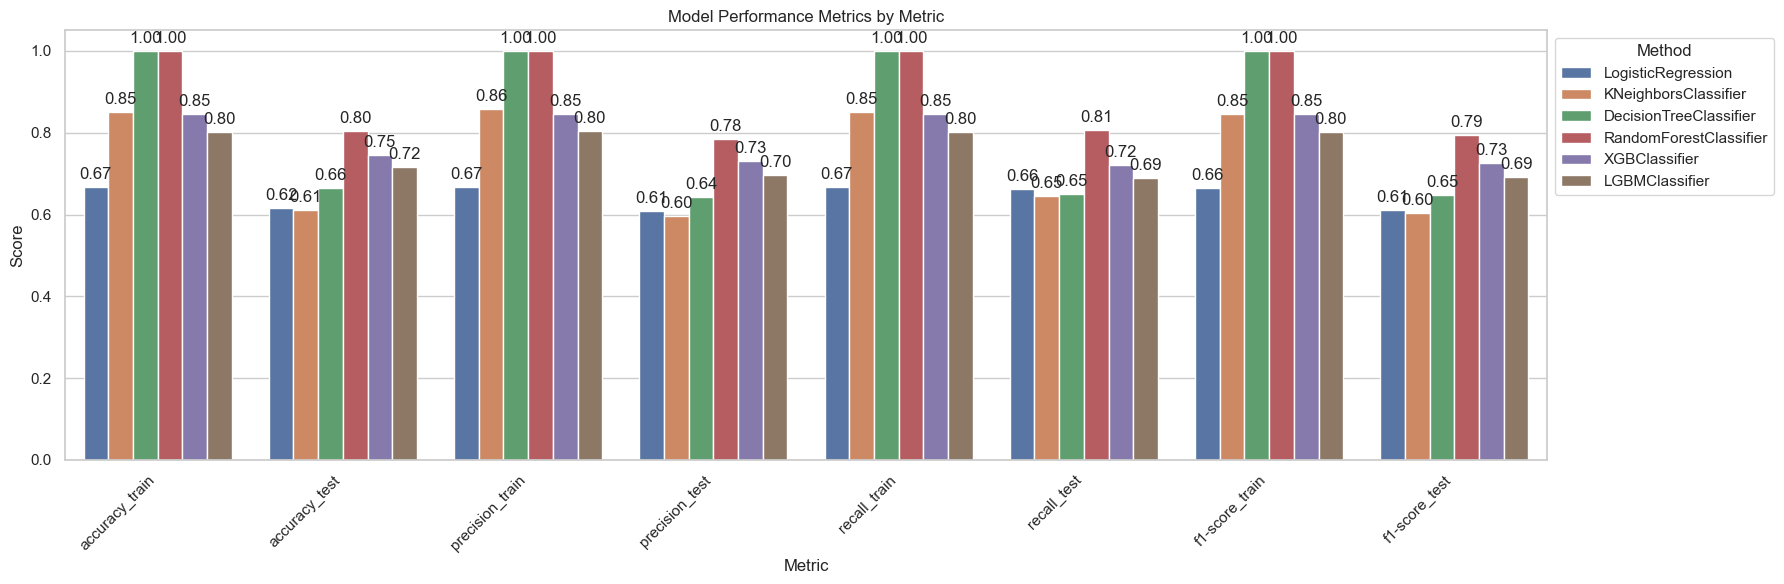

,Method,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1-score_train,f1-score_test
0,LogisticRegression,0.667848,0.615500,0.666765,0.609045,0.667848,0.661550,0.663737,0.610723
1,KNeighborsClassifier,0.851537,0.611150,0.859122,0.597571,0.851537,0.645289,0.845305,0.603372
2,DecisionTreeClassifier,1.000000,0.664700,1.000000,0.643079,1.000000,0.651303,1.000000,0.646936
3,RandomForestClassifier,0.999992,0.804400,0.999992,0.784606,0.999992,0.806881,0.999992,0.794408
4,XGBClassifier,0.846163,0.746250,0.846687,0.730503,0.846163,0.721603,0.846007,0.725748
5,LGBMClassifier,0.801322,0.715300,0.802923,0.695480,0.801322,0.688776,0.801222,0.691570


In [173]:
# Transpose the DataFrame to have models as rows and metrics as columns
df_transposed = sorted_data.set_index("Method").T.reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Set up the figure and axis
plt.figure(figsize=(18, 6))

# Plot the data using Seaborn's barplot
ax = sns.barplot(data=df_transposed.melt(id_vars="index"), x="index", y="value", hue="Method")

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance Metrics by Metric")
plt.xticks(rotation=45, ha="right")

# Add a legend
plt.legend(title="Method", bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Display the styled DataFrame
styled_df

Best three models are RandomForestClassifier, XGBClassifier, LGBMClassifier, but it's clear that RandomForestClassifier has highest overfitting issue. Furthermore, I need to look into their F1-score of train and test to get the best model.

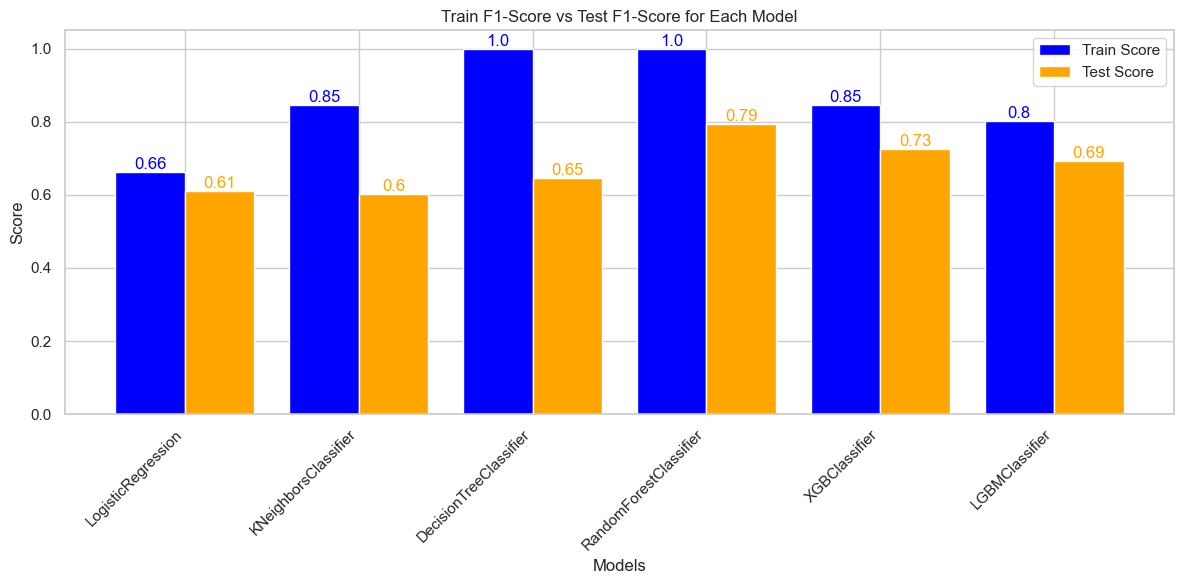

In [175]:
plt.figure(figsize=(12, 6))

bar_width = 0.4
index = range(len(sorted_data))

train_bars = plt.bar(index, sorted_data['f1-score_train'], width=bar_width, label='Train Score', color='blue')
test_bars = plt.bar([i + bar_width for i in index], sorted_data['f1-score_test'], width=bar_width, label='Test Score', color='orange')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Train F1-Score vs Test F1-Score for Each Model')
plt.xticks([i + bar_width/2 for i in index], sorted_data['Method'], rotation=45, ha='right')
plt.legend()

# Display values on top of bars
for bar in train_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='blue')

for bar in test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='orange')

plt.tight_layout()
plt.show()

Based on the highest test of F1-score and a slightly acceptable overfitting difference, the XGB Classifier achieved the best results. Therefore, the model needs to be tuned.

In [432]:
def plot_evaluation_metrics(model, X_train, y_train, X_test, y_test):
    # Calculate the confusion matrix for the train set
    y_train_pred = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Calculate the confusion matrix for the test set
    y_test_pred = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Create a ConfusionMatrixDisplay object for the train set
    cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Poor', 'Standard', 'Good'])
    
    # Create a ConfusionMatrixDisplay object for the test set
    cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Poor', 'Standard', 'Good'])

    # Plot the confusion matrix for the train set
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title("Train Set Confusion Matrix")
    cm_train_display.plot(ax=axes[0])

    # Plot the confusion matrix for the test set
    axes[1].set_title("Test Set Confusion Matrix")
    cm_test_display.plot(ax=axes[1])

    plt.show()

    # Print classification report for the train set
    report_train = classification_report(y_train, y_train_pred, target_names=['Poor', 'Standard', 'Good'])
    print("Classification Report for Train Set:\n{}".format(report_train))

    # Print classification report for the test set
    report_test = classification_report(y_test, y_test_pred, target_names=['Poor', 'Standard', 'Good'])
    print("Classification Report for Test Set:\n{}".format(report_test))

In [434]:
def plot_roc_auc(model, X_test, y_test):
    # Make predictions with probabilities
    y_pred_prob = model.predict_proba(X_test)
    
    # Calculate the number of classes
    n_classes = len(np.unique(y_test))
    
    # Initialize ROC AUC scores
    roc_auc_scores = []
    
    # Initialize plot
    plt.figure(figsize=(8, 6))
    
    # Calculate ROC AUC for each class
    for i in range(n_classes):
        roc_auc = roc_auc_score(y_test == i, y_pred_prob[:, i])
        roc_auc_scores.append(roc_auc)
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
        
        # Plot ROC curve for each class
        plt.plot(fpr, tpr, label=f'Class {i} (ROC AUC = {roc_auc:.2f})')
    
    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--', color='gray', lw=2, label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve for Each Class')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print ROC AUC scores for each class
    for i, roc_auc in enumerate(roc_auc_scores):
        print(f"ROC AUC for Class {i}: {roc_auc:.2f}")

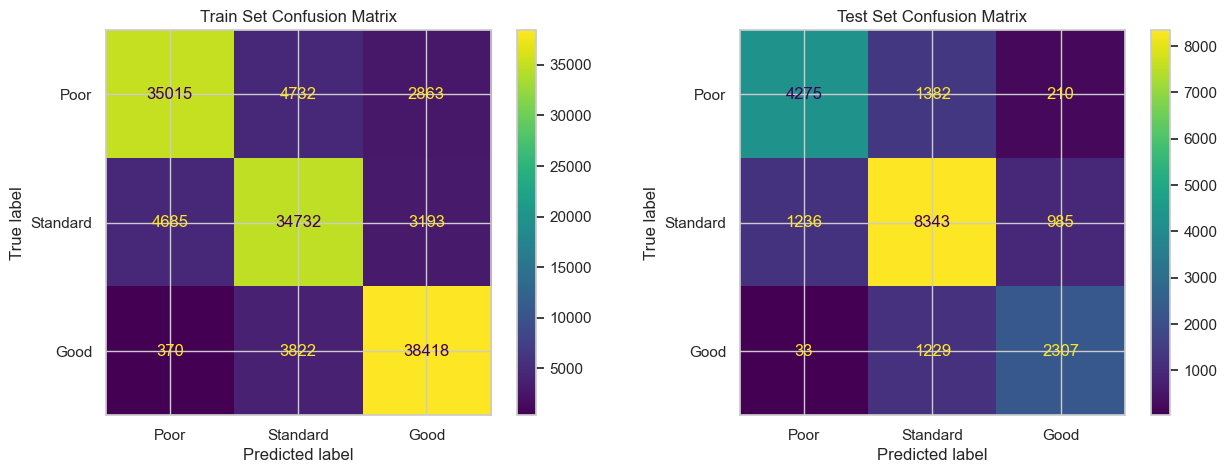

Classification Report for Train Set:
              precision    recall  f1-score   support

        Poor       0.87      0.82      0.85     42610
    Standard       0.80      0.82      0.81     42610
        Good       0.86      0.90      0.88     42610

    accuracy                           0.85    127830
   macro avg       0.85      0.85      0.85    127830
weighted avg       0.85      0.85      0.85    127830

Classification Report for Test Set:
              precision    recall  f1-score   support

        Poor       0.77      0.73      0.75      5867
    Standard       0.76      0.79      0.78     10564
        Good       0.66      0.65      0.65      3569

    accuracy                           0.75     20000
   macro avg       0.73      0.72      0.73     20000
weighted avg       0.75      0.75      0.75     20000



In [431]:
plot_evaluation_metrics(xgb_clf, X_train, y_train, X_test, y_test)

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


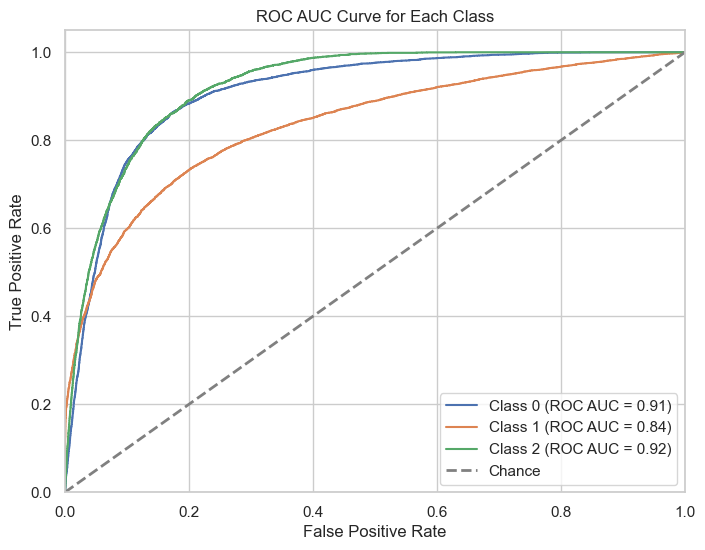

ROC AUC for Class 0: 0.91
ROC AUC for Class 1: 0.84
ROC AUC for Class 2: 0.92


In [433]:
plot_roc_auc(xgb_clf, X_test, y_test)

XGB Base Model has test accuracy of 0.75 with F1 Score as follow below:
1. Poor Class -> 0.75 (0.91)
2. Standard Class -> 0.78 (0.84)
3. Good Class -> 0.65 (0.92)

## Tuning Model

To determine what to prioritize, consider the following:

* False Positives (FP): These are individuals who are predicted to be "Good" but are actually "Poor" or "Standard". The risk here is potential financial loss if they default.
* False Negatives (FN): These are individuals who are predicted to be "Poor" or "Standard" but are actually "Good". The risk here is the loss of potential business opportunities.
* If the cost of FP (lending to someone who might default) is deemed higher than the cost of FN (missing out on a reliable customer), then precision should be prioritized. Conversely, if missing out on potential good customers (and thus potential profit) is deemed a greater cost than the risk of default, then recall should be prioritized.

XGB Multi-Class: https://stackoverflow.com/questions/57986259/multiclass-classification-with-xgboost-classifier

In [353]:
xgb_clf_tuning = xgb.XGBClassifier(objective="multi:softmax", eval_metric="merror", num_class=3, random_state=33)

param_grid = {
    'n_estimators': [3000],
    'learning_rate': [0.7],
    'max_depth' : [6, 7],
    'subsample': [0.8],
    'colsample_bytree': [0.1],
    'gamma': [0.55],
    'reg_alpha' : [18, 20],  
    'reg_lambda' : [20, 22]
}

In [356]:
# Precision scorer for multi-class classification
precision_scorer = make_scorer(precision_score, average='macro')

# Create HalvingGridSearchCV object
grid_model_xgb = HalvingGridSearchCV(xgb_clf_tuning, param_grid, cv=5, scoring=precision_scorer, n_jobs=-1)

In [357]:
# Stop if log loss doesn't improve for 10 rounds
fit_params = {
    "early_stopping_rounds": 10,
    "eval_set": [[X_test, y_test]]
}

# Fit the model
grid_model_xgb.fit(X_train, y_train, **fit_params)

# Print the best parameters
print("Best parameters found: ", grid_model_xgb.best_params_)

# Print the best score
print("Best parameters found: ", grid_model_xgb.best_score_)

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warn

[0]	validation_0-merror:0.59595
[0]	validation_0-merror:0.60785
[0]	validation_0-merror:0.61955
[0]	validation_0-merror:0.61860
[0]	validation_0-merror:0.61955
[0]	validation_0-merror:0.61870
[1]	validation_0-merror:0.46050
[0]	validation_0-merror:0.60945
[1]	validation_0-merror:0.47055
[1]	validation_0-merror:0.46610
[1]	validation_0-merror:0.47075
[1]	validation_0-merror:0.46440
[0]	validation_0-merror:0.61860
[1]	validation_0-merror:0.45910
[1]	validation_0-merror:0.46055
[2]	validation_0-merror:0.44400
[2]	validation_0-merror:0.44685
[2]	validation_0-merror:0.44780
[2]	validation_0-merror:0.44810
[2]	validation_0-merror:0.44435
[3]	validation_0-merror:0.44540
[2]	validation_0-merror:0.44060
[3]	validation_0-merror:0.45220
[2]	validation_0-merror:0.44195
[1]	validation_0-merror:0.46440
[3]	validation_0-merror:0.44405
[3]	validation_0-merror:0.44400
[3]	validation_0-merror:0.44435
[4]	validation_0-merror:0.42460
[4]	validation_0-merror:0.42125
[3]	validation_0-merror:0.44150
[4]	vali

[32]	validation_0-merror:0.32785
[30]	validation_0-merror:0.34060
[32]	validation_0-merror:0.32985
[32]	validation_0-merror:0.33095
[33]	validation_0-merror:0.33725
[33]	validation_0-merror:0.32945
[31]	validation_0-merror:0.33180
[32]	validation_0-merror:0.33060
[33]	validation_0-merror:0.32745
[33]	validation_0-merror:0.33010
[33]	validation_0-merror:0.33090
[31]	validation_0-merror:0.33965
[34]	validation_0-merror:0.32875
[34]	validation_0-merror:0.33665
[32]	validation_0-merror:0.33080
[33]	validation_0-merror:0.33020
[34]	validation_0-merror:0.32880
[34]	validation_0-merror:0.32900
[34]	validation_0-merror:0.32840
[32]	validation_0-merror:0.33705
[35]	validation_0-merror:0.32805
[35]	validation_0-merror:0.33530
[34]	validation_0-merror:0.32885
[33]	validation_0-merror:0.33025
[35]	validation_0-merror:0.32900
[35]	validation_0-merror:0.32870
[35]	validation_0-merror:0.32710
[36]	validation_0-merror:0.33615
[36]	validation_0-merror:0.32670
[33]	validation_0-merror:0.33780
[35]	valid

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.59595
[57]	validation_0-merror:0.32060
[58]	validation_0-merror:0.31535
[55]	validation_0-merror:0.31835
[57]	validation_0-merror:0.31680
[56]	validation_0-merror:0.32195
[55]	validation_0-merror:0.32965
[1]	validation_0-merror:0.46065
[57]	validation_0-merror:0.31930
[58]	validation_0-merror:0.31555
[59]	validation_0-merror:0.31565
[58]	validation_0-merror:0.32105
[57]	validation_0-merror:0.32165
[56]	validation_0-merror:0.31840
[56]	validation_0-merror:0.33005
[58]	validation_0-merror:0.31730
[60]	validation_0-merror:0.31575
[2]	validation_0-merror:0.44345
[58]	validation_0-merror:0.32160
[59]	validation_0-merror:0.31580
[57]	validation_0-merror:0.31715
[57]	validation_0-merror:0.32885
[59]	validation_0-merror:0.32080
[59]	validation_0-merror:0.31685
[3]	validation_0-merror:0.44580
[60]	validation_0-merror:0.31525
[61]	validation_0-merror:0.31465
[58]	validation_0-merror:0.31515
[59]	validation_0-merror:0.32045
[60]	validation_0-merror:0.32035
[58]	validatio

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[81]	validation_0-merror:0.31075
[83]	validation_0-merror:0.31670
[83]	validation_0-merror:0.31635
[84]	validation_0-merror:0.31085
[84]	validation_0-merror:0.31240
[28]	validation_0-merror:0.33305
[85]	validation_0-merror:0.31090
[82]	validation_0-merror:0.31060
[85]	validation_0-merror:0.31180
[84]	validation_0-merror:0.31605
[84]	validation_0-merror:0.31585
[29]	validation_0-merror:0.33245
[85]	validation_0-merror:0.31150
[86]	validation_0-merror:0.31030
[0]	validation_0-merror:0.61440
[86]	validation_0-merror:0.31130
[83]	validation_0-merror:0.31105
[86]	validation_0-merror:0.31095
[30]	validation_0-merror:0.33250
[85]	validation_0-merror:0.31555
[85]	validation_0-merror:0.31575
[1]	validation_0-merror:0.46535
[87]	validation_0-merror:0.31030
[87]	validation_0-merror:0.31195
[86]	validation_0-merror:0.31570
[84]	validation_0-merror:0.31075
[87]	validation_0-merror:0.31065
[86]	validation_0-merror:0.31580
[31]	validation_0-merror:0.33185
[88]	validation_0-merror:0.31175
[88]	validat

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-merror:0.32410
[100]	validation_0-merror:0.31025
[99]	validation_0-merror:0.31130
[13]	validation_0-merror:0.35305
[43]	validation_0-merror:0.32370
[0]	validation_0-merror:0.61955
[101]	validation_0-merror:0.31010
[14]	validation_0-merror:0.35155
[100]	validation_0-merror:0.31120
[0]	validation_0-merror:0.60435
[44]	validation_0-merror:0.32390
[102]	validation_0-merror:0.31020
[1]	validation_0-merror:0.47105
[101]	validation_0-merror:0.31150
[15]	validation_0-merror:0.35170
[45]	validation_0-merror:0.32330
[1]	validation_0-merror:0.46150
[103]	validation_0-merror:0.31075
[102]	validation_0-merror:0.31100
[16]	validation_0-merror:0.34780
[46]	validation_0-merror:0.32150
[2]	validation_0-merror:0.44330
[104]	validation_0-merror:0.31095
[17]	validation_0-merror:0.34290
[2]	validation_0-merror:0.44855
[103]	validation_0-merror:0.31130
[105]	validation_0-merror:0.31105
[3]	validation_0-merror:0.44415
[47]	validation_0-merror:0.32220
[18]	validation_0-merror:0.34325
[3]	val

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.36765
[21]	validation_0-merror:0.33840
[109]	validation_0-merror:0.30965
[7]	validation_0-merror:0.37190
[22]	validation_0-merror:0.33650
[51]	validation_0-merror:0.31910
[110]	validation_0-merror:0.30985
[7]	validation_0-merror:0.36970
[0]	validation_0-merror:0.61850
[8]	validation_0-merror:0.36835
[52]	validation_0-merror:0.31850
[111]	validation_0-merror:0.30985
[23]	validation_0-merror:0.33710
[1]	validation_0-merror:0.46225
[8]	validation_0-merror:0.36575
[9]	validation_0-merror:0.36385
[53]	validation_0-merror:0.31880
[112]	validation_0-merror:0.31085
[24]	validation_0-merror:0.33560
[9]	validation_0-merror:0.36325
[10]	validation_0-merror:0.36075
[0]	validation_0-merror:0.59010
[2]	validation_0-merror:0.44335
[113]	validation_0-merror:0.31105
[54]	validation_0-merror:0.31940
[25]	validation_0-merror:0.33210
[10]	validation_0-merror:0.36085
[11]	validation_0-merror:0.35805
[1]	validation_0-merror:0.46365
[3]	validation_0-merror:0.44225
[114]	validation_0

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-merror:0.37050
[59]	validation_0-merror:0.31780
[16]	validation_0-merror:0.34770
[6]	validation_0-merror:0.37190
[30]	validation_0-merror:0.32875
[119]	validation_0-merror:0.30970
[15]	validation_0-merror:0.36265
[8]	validation_0-merror:0.36405
[60]	validation_0-merror:0.31695
[17]	validation_0-merror:0.34470
[120]	validation_0-merror:0.31015
[16]	validation_0-merror:0.35585
[7]	validation_0-merror:0.37215
[31]	validation_0-merror:0.32890
[0]	validation_0-merror:0.59800
[9]	validation_0-merror:0.36130
[121]	validation_0-merror:0.30985
[18]	validation_0-merror:0.34490
[61]	validation_0-merror:0.31635
[17]	validation_0-merror:0.35250
[8]	validation_0-merror:0.36685
[32]	validation_0-merror:0.32960
[1]	validation_0-merror:0.46480
[10]	validation_0-merror:0.35970
[18]	validation_0-merror:0.35100
[122]	validation_0-merror:0.31015
[19]	validation_0-merror:0.34535
[9]	validation_0-merror:0.36375
[62]	validation_0-merror:0.31785
[33]	validation_0-merror:0.32945
[2]	validation_

[46]	validation_0-merror:0.33260
[38]	validation_0-merror:0.32615
[91]	validation_0-merror:0.31100
[38]	validation_0-merror:0.32800
[61]	validation_0-merror:0.31630
[151]	validation_0-merror:0.30560
[48]	validation_0-merror:0.32425
[39]	validation_0-merror:0.32450
[30]	validation_0-merror:0.33095
[47]	validation_0-merror:0.33250
[92]	validation_0-merror:0.31100
[39]	validation_0-merror:0.32790
[62]	validation_0-merror:0.31670
[152]	validation_0-merror:0.30580
[49]	validation_0-merror:0.32505
[40]	validation_0-merror:0.32515
[31]	validation_0-merror:0.33140
[48]	validation_0-merror:0.33260
[40]	validation_0-merror:0.32785
[153]	validation_0-merror:0.30650
[63]	validation_0-merror:0.31735
[32]	validation_0-merror:0.33060
[50]	validation_0-merror:0.32385
[41]	validation_0-merror:0.32505
[41]	validation_0-merror:0.32710
[154]	validation_0-merror:0.30600
[51]	validation_0-merror:0.32365
[33]	validation_0-merror:0.33010
[64]	validation_0-merror:0.31655
[42]	validation_0-merror:0.32435
[65]	v

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-merror:0.32300
[0]	validation_0-merror:0.61955
[72]	validation_0-merror:0.31295
[49]	validation_0-merror:0.32150
[59]	validation_0-merror:0.32170
[41]	validation_0-merror:0.32590
[49]	validation_0-merror:0.32285
[1]	validation_0-merror:0.47205
[60]	validation_0-merror:0.32200
[50]	validation_0-merror:0.32085
[50]	validation_0-merror:0.32310
[42]	validation_0-merror:0.32550
[0]	validation_0-merror:0.59860
[2]	validation_0-merror:0.44850
[73]	validation_0-merror:0.31320
[51]	validation_0-merror:0.32275
[61]	validation_0-merror:0.32165
[43]	validation_0-merror:0.32510
[1]	validation_0-merror:0.46155
[51]	validation_0-merror:0.32010
[3]	validation_0-merror:0.44410
[52]	validation_0-merror:0.32105
[62]	validation_0-merror:0.31935
[52]	validation_0-merror:0.31885
[4]	validation_0-merror:0.42165
[44]	validation_0-merror:0.32565
[2]	validation_0-merror:0.44290
[53]	validation_0-merror:0.32185
[74]	validation_0-merror:0.31265
[53]	validation_0-merror:0.31940
[63]	validation_0-

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[70]	validation_0-merror:0.31945
[10]	validation_0-merror:0.36075
[12]	validation_0-merror:0.36130
[60]	validation_0-merror:0.31510
[0]	validation_0-merror:0.61850
[52]	validation_0-merror:0.32275
[61]	validation_0-merror:0.31930
[71]	validation_0-merror:0.31905
[80]	validation_0-merror:0.31230
[11]	validation_0-merror:0.35810
[13]	validation_0-merror:0.36030
[53]	validation_0-merror:0.32350
[1]	validation_0-merror:0.46240
[62]	validation_0-merror:0.32000
[61]	validation_0-merror:0.31605
[72]	validation_0-merror:0.31925
[12]	validation_0-merror:0.35825
[14]	validation_0-merror:0.36355
[81]	validation_0-merror:0.31155
[54]	validation_0-merror:0.32265
[63]	validation_0-merror:0.31945
[2]	validation_0-merror:0.44340
[62]	validation_0-merror:0.31575
[13]	validation_0-merror:0.35415
[73]	validation_0-merror:0.31830
[15]	validation_0-merror:0.36245
[3]	validation_0-merror:0.44240
[55]	validation_0-merror:0.32215
[63]	validation_0-merror:0.31585
[64]	validation_0-merror:0.31880
[82]	validatio

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-merror:0.31155
[85]	validation_0-merror:0.31360
[35]	validation_0-merror:0.32930
[36]	validation_0-merror:0.33755
[77]	validation_0-merror:0.31325
[27]	validation_0-merror:0.33290
[86]	validation_0-merror:0.31185
[86]	validation_0-merror:0.31355
[36]	validation_0-merror:0.32870
[0]	validation_0-merror:0.59010
[37]	validation_0-merror:0.33400
[78]	validation_0-merror:0.31340
[28]	validation_0-merror:0.33185
[87]	validation_0-merror:0.31165
[37]	validation_0-merror:0.32675
[87]	validation_0-merror:0.31280
[1]	validation_0-merror:0.46380
[38]	validation_0-merror:0.33400
[29]	validation_0-merror:0.33250
[79]	validation_0-merror:0.31275
[38]	validation_0-merror:0.32740
[88]	validation_0-merror:0.31150
[88]	validation_0-merror:0.31295
[39]	validation_0-merror:0.33175
[2]	validation_0-merror:0.44605
[30]	validation_0-merror:0.33150
[80]	validation_0-merror:0.31215
[39]	validation_0-merror:0.32665
[89]	validation_0-merror:0.31325
[89]	validation_0-merror:0.31135
[40]	validati

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-merror:0.37190
[93]	validation_0-merror:0.31070
[34]	validation_0-merror:0.32920
[42]	validation_0-merror:0.32675
[93]	validation_0-merror:0.31245
[43]	validation_0-merror:0.33190
[84]	validation_0-merror:0.31265
[0]	validation_0-merror:0.59800
[7]	validation_0-merror:0.37230
[94]	validation_0-merror:0.31115
[35]	validation_0-merror:0.32920
[44]	validation_0-merror:0.33105
[94]	validation_0-merror:0.31240
[43]	validation_0-merror:0.32680
[85]	validation_0-merror:0.31285
[8]	validation_0-merror:0.36695
[45]	validation_0-merror:0.33145
[1]	validation_0-merror:0.46485
[95]	validation_0-merror:0.30990
[95]	validation_0-merror:0.31240
[36]	validation_0-merror:0.32915
[86]	validation_0-merror:0.31245
[44]	validation_0-merror:0.32590
[46]	validation_0-merror:0.33125
[9]	validation_0-merror:0.36370
[96]	validation_0-merror:0.31010
[2]	validation_0-merror:0.44950
[96]	validation_0-merror:0.31110
[45]	validation_0-merror:0.32525
[37]	validation_0-merror:0.32715
[47]	validation_0

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-merror:0.32250
[17]	validation_0-merror:0.34500
[112]	validation_0-merror:0.30905
[51]	validation_0-merror:0.31990
[61]	validation_0-merror:0.32885
[24]	validation_0-merror:0.34105
[59]	validation_0-merror:0.32225
[18]	validation_0-merror:0.34425
[113]	validation_0-merror:0.30885
[52]	validation_0-merror:0.31930
[62]	validation_0-merror:0.32815
[25]	validation_0-merror:0.33810
[60]	validation_0-merror:0.32205
[19]	validation_0-merror:0.34260
[0]	validation_0-merror:0.59415
[114]	validation_0-merror:0.30955
[53]	validation_0-merror:0.31960
[63]	validation_0-merror:0.32730
[26]	validation_0-merror:0.33700
[61]	validation_0-merror:0.32225
[20]	validation_0-merror:0.34200
[115]	validation_0-merror:0.30910
[1]	validation_0-merror:0.46035
[54]	validation_0-merror:0.31930
[64]	validation_0-merror:0.32885
[27]	validation_0-merror:0.33535
[21]	validation_0-merror:0.34045
[62]	validation_0-merror:0.32130
[116]	validation_0-merror:0.30880
[55]	validation_0-merror:0.31910
[2]	val

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-merror:0.31740
[120]	validation_0-merror:0.30870
[66]	validation_0-merror:0.32085
[25]	validation_0-merror:0.33610
[31]	validation_0-merror:0.33290
[5]	validation_0-merror:0.37945
[69]	validation_0-merror:0.32860
[60]	validation_0-merror:0.31655
[67]	validation_0-merror:0.32055
[26]	validation_0-merror:0.33510
[32]	validation_0-merror:0.33185
[121]	validation_0-merror:0.30865
[70]	validation_0-merror:0.32895
[0]	validation_0-merror:0.60855
[61]	validation_0-merror:0.31580
[68]	validation_0-merror:0.32045
[33]	validation_0-merror:0.33095
[27]	validation_0-merror:0.33330
[122]	validation_0-merror:0.30920
[6]	validation_0-merror:0.36530
[71]	validation_0-merror:0.32930
[69]	validation_0-merror:0.32145
[1]	validation_0-merror:0.45200
[34]	validation_0-merror:0.33005
[123]	validation_0-merror:0.30845
[28]	validation_0-merror:0.33170
[62]	validation_0-merror:0.31545
[7]	validation_0-merror:0.36715
[72]	validation_0-merror:0.32925
[124]	validation_0-merror:0.30830
[29]	valid

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-merror:0.32840
[10]	validation_0-merror:0.36245
[16]	validation_0-merror:0.35660
[78]	validation_0-merror:0.31935
[44]	validation_0-merror:0.32460
[134]	validation_0-merror:0.30785
[39]	validation_0-merror:0.32680
[73]	validation_0-merror:0.31355
[17]	validation_0-merror:0.35360
[11]	validation_0-merror:0.36095
[45]	validation_0-merror:0.32405
[135]	validation_0-merror:0.30805
[79]	validation_0-merror:0.31870
[0]	validation_0-merror:0.60655
[40]	validation_0-merror:0.32565
[12]	validation_0-merror:0.35995
[136]	validation_0-merror:0.30760
[74]	validation_0-merror:0.31365
[18]	validation_0-merror:0.35310
[46]	validation_0-merror:0.32315
[80]	validation_0-merror:0.31860
[1]	validation_0-merror:0.46045
[41]	validation_0-merror:0.32510
[13]	validation_0-merror:0.35690
[137]	validation_0-merror:0.30770
[47]	validation_0-merror:0.32380
[75]	validation_0-merror:0.31450
[19]	validation_0-merror:0.35220
[81]	validation_0-merror:0.31885
[2]	validation_0-merror:0.44225
[48]	vali

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[75]	validation_0-merror:0.31610
[28]	validation_0-merror:0.32975
[168]	validation_0-merror:0.30585
[40]	validation_0-merror:0.32725
[105]	validation_0-merror:0.30925
[45]	validation_0-merror:0.33015
[71]	validation_0-merror:0.31575
[0]	validation_0-merror:0.60010
[169]	validation_0-merror:0.30520
[29]	validation_0-merror:0.33010
[76]	validation_0-merror:0.31615
[106]	validation_0-merror:0.30920
[72]	validation_0-merror:0.31555
[41]	validation_0-merror:0.32580
[46]	validation_0-merror:0.32930
[1]	validation_0-merror:0.45725
[30]	validation_0-merror:0.32920
[77]	validation_0-merror:0.31515
[107]	validation_0-merror:0.30975
[73]	validation_0-merror:0.31520
[42]	validation_0-merror:0.32535
[47]	validation_0-merror:0.32940
[31]	validation_0-merror:0.32970
[2]	validation_0-merror:0.43945
[78]	validation_0-merror:0.31410
[108]	validation_0-merror:0.30895
[74]	validation_0-merror:0.31595
[109]	validation_0-merror:0.30785
[43]	validation_0-merror:0.32505
[3]	validation_0-merror:0.44265
[48]	va

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-merror:0.32220
[42]	validation_0-merror:0.32045
[121]	validation_0-merror:0.30800
[14]	validation_0-merror:0.35065
[91]	validation_0-merror:0.31190
[87]	validation_0-merror:0.31240
[59]	validation_0-merror:0.32685
[54]	validation_0-merror:0.32140
[122]	validation_0-merror:0.30825
[92]	validation_0-merror:0.31190
[88]	validation_0-merror:0.31265
[15]	validation_0-merror:0.34965
[43]	validation_0-merror:0.32040
[60]	validation_0-merror:0.32730
[0]	validation_0-merror:0.63220
[89]	validation_0-merror:0.31285
[123]	validation_0-merror:0.30820
[93]	validation_0-merror:0.31280
[55]	validation_0-merror:0.32175
[16]	validation_0-merror:0.34695
[44]	validation_0-merror:0.31955
[1]	validation_0-merror:0.46080
[61]	validation_0-merror:0.32675
[90]	validation_0-merror:0.31285
[94]	validation_0-merror:0.31230
[56]	validation_0-merror:0.32230
[17]	validation_0-merror:0.34455
[45]	validation_0-merror:0.31940
[91]	validation_0-merror:0.31285
[2]	validation_0-merror:0.44395
[62]	valid

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[105]	validation_0-merror:0.31090
[65]	validation_0-merror:0.31955
[26]	validation_0-merror:0.33345
[54]	validation_0-merror:0.31815
[106]	validation_0-merror:0.31120
[71]	validation_0-merror:0.32635
[11]	validation_0-merror:0.35540
[66]	validation_0-merror:0.31920
[0]	validation_0-merror:0.59415
[27]	validation_0-merror:0.33190
[107]	validation_0-merror:0.31125
[12]	validation_0-merror:0.35525
[72]	validation_0-merror:0.32595
[67]	validation_0-merror:0.31975
[55]	validation_0-merror:0.31760
[0]	validation_0-merror:0.59665
[108]	validation_0-merror:0.31145
[1]	validation_0-merror:0.46040
[28]	validation_0-merror:0.33035
[13]	validation_0-merror:0.35115
[68]	validation_0-merror:0.31930
[73]	validation_0-merror:0.32700
[56]	validation_0-merror:0.31675
[109]	validation_0-merror:0.31030
[1]	validation_0-merror:0.45245
[29]	validation_0-merror:0.33010
[2]	validation_0-merror:0.44230
[14]	validation_0-merror:0.34985
[69]	validation_0-merror:0.31945
[57]	validation_0-merror:0.31485
[110]	vali

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.60655
[15]	validation_0-merror:0.35955
[27]	validation_0-merror:0.32990
[70]	validation_0-merror:0.31020
[15]	validation_0-merror:0.35570
[43]	validation_0-merror:0.32040
[71]	validation_0-merror:0.31065
[28]	validation_0-merror:0.32910
[1]	validation_0-merror:0.46050
[16]	validation_0-merror:0.35110
[44]	validation_0-merror:0.32055
[16]	validation_0-merror:0.34855
[72]	validation_0-merror:0.31050
[0]	validation_0-merror:0.60010
[29]	validation_0-merror:0.32960
[17]	validation_0-merror:0.34945
[2]	validation_0-merror:0.44225
[45]	validation_0-merror:0.31990
[30]	validation_0-merror:0.32855
[1]	validation_0-merror:0.45770
[18]	validation_0-merror:0.35025
[73]	validation_0-merror:0.31030
[46]	validation_0-merror:0.31885
[3]	validation_0-merror:0.44025
[17]	validation_0-merror:0.34485
[31]	validation_0-merror:0.32890
[2]	validation_0-merror:0.44005
[19]	validation_0-merror:0.34970
[18]	validation_0-merror:0.34510
[4]	validation_0-merror:0.41435
[74]	validation_0-

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-merror:0.34180
[50]	validation_0-merror:0.31915
[7]	validation_0-merror:0.36775
[0]	validation_0-merror:0.62315
[77]	validation_0-merror:0.30805
[21]	validation_0-merror:0.33760
[35]	validation_0-merror:0.32720
[6]	validation_0-merror:0.37040
[51]	validation_0-merror:0.31850
[78]	validation_0-merror:0.30775
[8]	validation_0-merror:0.36270
[1]	validation_0-merror:0.45990
[23]	validation_0-merror:0.34100
[36]	validation_0-merror:0.32650
[22]	validation_0-merror:0.33785
[7]	validation_0-merror:0.36905
[9]	validation_0-merror:0.36065
[52]	validation_0-merror:0.31830
[79]	validation_0-merror:0.30770
[24]	validation_0-merror:0.34000
[37]	validation_0-merror:0.32595
[2]	validation_0-merror:0.44395
[23]	validation_0-merror:0.33605
[8]	validation_0-merror:0.36410
[53]	validation_0-merror:0.31825
[10]	validation_0-merror:0.35675
[80]	validation_0-merror:0.30750
[38]	validation_0-merror:0.32510
[3]	validation_0-merror:0.44955
[25]	validation_0-merror:0.33950
[24]	validation_0-me

[81]	validation_0-merror:0.30935
[38]	validation_0-merror:0.32535
[37]	validation_0-merror:0.32620
[53]	validation_0-merror:0.33005
[110]	validation_0-merror:0.30525
[52]	validation_0-merror:0.32145
[66]	validation_0-merror:0.31290
[30]	validation_0-merror:0.32925
[39]	validation_0-merror:0.32485
[82]	validation_0-merror:0.31010
[38]	validation_0-merror:0.32515
[53]	validation_0-merror:0.32270
[111]	validation_0-merror:0.30535
[67]	validation_0-merror:0.31320
[54]	validation_0-merror:0.32945
[31]	validation_0-merror:0.32935
[40]	validation_0-merror:0.32300
[39]	validation_0-merror:0.32415
[68]	validation_0-merror:0.31300
[54]	validation_0-merror:0.32275
[112]	validation_0-merror:0.30485
[83]	validation_0-merror:0.30935
[55]	validation_0-merror:0.32945
[32]	validation_0-merror:0.32900
[40]	validation_0-merror:0.32340
[69]	validation_0-merror:0.31175
[41]	validation_0-merror:0.32060
[113]	validation_0-merror:0.30510
[55]	validation_0-merror:0.32240
[84]	validation_0-merror:0.30895
[56]	v

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-merror:0.32080
[58]	validation_0-merror:0.31560
[88]	validation_0-merror:0.30825
[105]	validation_0-merror:0.30545
[54]	validation_0-merror:0.31915
[61]	validation_0-merror:0.31285
[74]	validation_0-merror:0.31725
[59]	validation_0-merror:0.31655
[89]	validation_0-merror:0.30810
[106]	validation_0-merror:0.30585
[55]	validation_0-merror:0.31970
[62]	validation_0-merror:0.31265
[75]	validation_0-merror:0.31740
[60]	validation_0-merror:0.31575
[90]	validation_0-merror:0.30740
[107]	validation_0-merror:0.30555
[56]	validation_0-merror:0.31880
[63]	validation_0-merror:0.31190
[91]	validation_0-merror:0.30715
[76]	validation_0-merror:0.31575
[61]	validation_0-merror:0.31515
[0]	validation_0-merror:0.59415
[108]	validation_0-merror:0.30515
[57]	validation_0-merror:0.31720
[92]	validation_0-merror:0.30760
[64]	validation_0-merror:0.31135
[62]	validation_0-merror:0.31485
[77]	validation_0-merror:0.31625
[1]	validation_0-merror:0.46125
[109]	validation_0-merror:0.30380
[65]	va

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[78]	validation_0-merror:0.31655
[2]	validation_0-merror:0.44110
[63]	validation_0-merror:0.31560
[59]	validation_0-merror:0.31540
[66]	validation_0-merror:0.31155
[94]	validation_0-merror:0.30815
[111]	validation_0-merror:0.30500
[79]	validation_0-merror:0.31685
[3]	validation_0-merror:0.43665
[67]	validation_0-merror:0.31140
[64]	validation_0-merror:0.31505
[95]	validation_0-merror:0.30740
[60]	validation_0-merror:0.31520
[0]	validation_0-merror:0.58835
[112]	validation_0-merror:0.30495
[4]	validation_0-merror:0.41365
[80]	validation_0-merror:0.31590
[65]	validation_0-merror:0.31425
[68]	validation_0-merror:0.31155
[113]	validation_0-merror:0.30465
[96]	validation_0-merror:0.30710
[61]	validation_0-merror:0.31555
[1]	validation_0-merror:0.45375
[81]	validation_0-merror:0.31595
[5]	validation_0-merror:0.38060
[69]	validation_0-merror:0.31165
[66]	validation_0-merror:0.31440
[114]	validation_0-merror:0.30510
[97]	validation_0-merror:0.30700
[62]	validation_0-merror:0.31640
[2]	validati

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-merror:0.35265
[95]	validation_0-merror:0.31455
[15]	validation_0-merror:0.35665
[79]	validation_0-merror:0.31085
[75]	validation_0-merror:0.31090
[82]	validation_0-merror:0.30895
[96]	validation_0-merror:0.31465
[16]	validation_0-merror:0.34945
[19]	validation_0-merror:0.35270
[76]	validation_0-merror:0.31160
[80]	validation_0-merror:0.31040
[83]	validation_0-merror:0.30805
[97]	validation_0-merror:0.31435
[0]	validation_0-merror:0.60965
[17]	validation_0-merror:0.34575
[81]	validation_0-merror:0.31145
[84]	validation_0-merror:0.30810
[77]	validation_0-merror:0.31125
[20]	validation_0-merror:0.34790
[98]	validation_0-merror:0.31435
[1]	validation_0-merror:0.45895
[18]	validation_0-merror:0.34565
[82]	validation_0-merror:0.31085
[78]	validation_0-merror:0.31120
[85]	validation_0-merror:0.30845
[99]	validation_0-merror:0.31435
[19]	validation_0-merror:0.34480
[2]	validation_0-merror:0.44145
[21]	validation_0-merror:0.34470
[86]	validation_0-merror:0.30755
[83]	validati

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-merror:0.30960
[81]	validation_0-merror:0.30930
[5]	validation_0-merror:0.38080
[89]	validation_0-merror:0.30890
[102]	validation_0-merror:0.31445
[22]	validation_0-merror:0.33700
[86]	validation_0-merror:0.30945
[24]	validation_0-merror:0.34370
[82]	validation_0-merror:0.30965
[6]	validation_0-merror:0.36815
[90]	validation_0-merror:0.30915
[87]	validation_0-merror:0.30945
[103]	validation_0-merror:0.31410
[23]	validation_0-merror:0.33665
[25]	validation_0-merror:0.34080
[83]	validation_0-merror:0.30925
[91]	validation_0-merror:0.30905
[7]	validation_0-merror:0.36795
[0]	validation_0-merror:0.59590
[88]	validation_0-merror:0.31010
[104]	validation_0-merror:0.31425
[24]	validation_0-merror:0.33710
[26]	validation_0-merror:0.33985
[84]	validation_0-merror:0.30890
[89]	validation_0-merror:0.31075
[92]	validation_0-merror:0.30880
[105]	validation_0-merror:0.31435
[1]	validation_0-merror:0.46430
[8]	validation_0-merror:0.36275
[25]	validation_0-merror:0.33450
[90]	validat

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[102]	validation_0-merror:0.30925
[118]	validation_0-merror:0.31300
[14]	validation_0-merror:0.35425
[39]	validation_0-merror:0.33090
[21]	validation_0-merror:0.33770
[37]	validation_0-merror:0.32705
[40]	validation_0-merror:0.33240
[119]	validation_0-merror:0.31295
[103]	validation_0-merror:0.30960
[22]	validation_0-merror:0.33725
[15]	validation_0-merror:0.35340
[38]	validation_0-merror:0.32650
[0]	validation_0-merror:0.62245
[104]	validation_0-merror:0.30895
[120]	validation_0-merror:0.31260
[16]	validation_0-merror:0.34920
[41]	validation_0-merror:0.33165
[23]	validation_0-merror:0.33610
[39]	validation_0-merror:0.32560
[1]	validation_0-merror:0.46030
[17]	validation_0-merror:0.34685
[105]	validation_0-merror:0.30870
[121]	validation_0-merror:0.31245
[24]	validation_0-merror:0.33605
[40]	validation_0-merror:0.32675
[18]	validation_0-merror:0.34675
[42]	validation_0-merror:0.33055
[2]	validation_0-merror:0.44710
[106]	validation_0-merror:0.30860
[122]	validation_0-merror:0.31235
[25

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-merror:0.33095
[48]	validation_0-merror:0.33115
[8]	validation_0-merror:0.36045
[24]	validation_0-merror:0.33970
[46]	validation_0-merror:0.32485
[128]	validation_0-merror:0.31265
[31]	validation_0-merror:0.33125
[9]	validation_0-merror:0.35870
[0]	validation_0-merror:0.59415
[49]	validation_0-merror:0.33000
[129]	validation_0-merror:0.31255
[25]	validation_0-merror:0.33655
[47]	validation_0-merror:0.32510
[10]	validation_0-merror:0.35620
[32]	validation_0-merror:0.32995
[1]	validation_0-merror:0.46225
[26]	validation_0-merror:0.33525
[50]	validation_0-merror:0.32970
[130]	validation_0-merror:0.31265
[48]	validation_0-merror:0.32440
[33]	validation_0-merror:0.32915
[51]	validation_0-merror:0.32945
[11]	validation_0-merror:0.35675
[27]	validation_0-merror:0.33390
[2]	validation_0-merror:0.44160
[131]	validation_0-merror:0.31285
[49]	validation_0-merror:0.32465
[12]	validation_0-merror:0.35665
[34]	validation_0-merror:0.32885
[52]	validation_0-merror:0.32995


/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-merror:0.43725
[28]	validation_0-merror:0.33280
[132]	validation_0-merror:0.31295
[50]	validation_0-merror:0.32435
[13]	validation_0-merror:0.35200
[35]	validation_0-merror:0.32915
[53]	validation_0-merror:0.32950
[29]	validation_0-merror:0.33275
[4]	validation_0-merror:0.41580
[0]	validation_0-merror:0.58960
[14]	validation_0-merror:0.35015
[51]	validation_0-merror:0.32455
[54]	validation_0-merror:0.32955
[36]	validation_0-merror:0.32750
[1]	validation_0-merror:0.45375
[30]	validation_0-merror:0.33235
[15]	validation_0-merror:0.35090
[5]	validation_0-merror:0.38225
[52]	validation_0-merror:0.32495
[37]	validation_0-merror:0.32635
[2]	validation_0-merror:0.43675
[55]	validation_0-merror:0.32955
[6]	validation_0-merror:0.36685
[31]	validation_0-merror:0.33200
[16]	validation_0-merror:0.34780
[53]	validation_0-merror:0.32455
[38]	validation_0-merror:0.32615
[3]	validation_0-merror:0.43740
[56]	validation_0-merror:0.32885
[17]	validation_0-merror:0.34445
[7]	validation_0-

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-merror:0.36440
[62]	validation_0-merror:0.32760
[44]	validation_0-merror:0.32185
[60]	validation_0-merror:0.32240
[13]	validation_0-merror:0.35660
[39]	validation_0-merror:0.32465
[24]	validation_0-merror:0.33645
[10]	validation_0-merror:0.36130
[63]	validation_0-merror:0.32765
[45]	validation_0-merror:0.32210
[14]	validation_0-merror:0.36250
[0]	validation_0-merror:0.60965
[61]	validation_0-merror:0.32215
[25]	validation_0-merror:0.33475
[46]	validation_0-merror:0.32165
[11]	validation_0-merror:0.35895
[15]	validation_0-merror:0.36145
[40]	validation_0-merror:0.32490
[1]	validation_0-merror:0.45925
[26]	validation_0-merror:0.33310
[62]	validation_0-merror:0.32130
[64]	validation_0-merror:0.32970
[12]	validation_0-merror:0.35885
[47]	validation_0-merror:0.32210
[16]	validation_0-merror:0.35740
[2]	validation_0-merror:0.44165
[27]	validation_0-merror:0.33225
[41]	validation_0-merror:0.32410
[65]	validation_0-merror:0.32950
[63]	validation_0-merror:0.32080
[13]	validatio

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[83]	validation_0-merror:0.32615
[46]	validation_0-merror:0.32270
[66]	validation_0-merror:0.31520
[21]	validation_0-merror:0.33915
[81]	validation_0-merror:0.31730
[31]	validation_0-merror:0.33430
[35]	validation_0-merror:0.33815
[60]	validation_0-merror:0.31590
[67]	validation_0-merror:0.31500
[84]	validation_0-merror:0.32570
[22]	validation_0-merror:0.33870
[47]	validation_0-merror:0.32305
[36]	validation_0-merror:0.33750
[61]	validation_0-merror:0.31535
[82]	validation_0-merror:0.31800
[32]	validation_0-merror:0.33180
[68]	validation_0-merror:0.31570
[85]	validation_0-merror:0.32555
[48]	validation_0-merror:0.32210
[23]	validation_0-merror:0.33685
[37]	validation_0-merror:0.33430
[33]	validation_0-merror:0.33160
[69]	validation_0-merror:0.31445
[62]	validation_0-merror:0.31505
[83]	validation_0-merror:0.31780
[86]	validation_0-merror:0.32560
[24]	validation_0-merror:0.33735
[49]	validation_0-merror:0.32260
[38]	validation_0-merror:0.33465
[70]	validation_0-merror:0.31375
[34]	valid

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[114]	validation_0-merror:0.30870
[109]	validation_0-merror:0.30830
[31]	validation_0-merror:0.33235
[81]	validation_0-merror:0.32450
[69]	validation_0-merror:0.31335
[77]	validation_0-merror:0.31755
[30]	validation_0-merror:0.33050
[115]	validation_0-merror:0.30850
[110]	validation_0-merror:0.30705
[82]	validation_0-merror:0.32530
[70]	validation_0-merror:0.31300
[78]	validation_0-merror:0.31825
[32]	validation_0-merror:0.33110
[31]	validation_0-merror:0.32995
[111]	validation_0-merror:0.30710
[116]	validation_0-merror:0.30810
[71]	validation_0-merror:0.31265
[33]	validation_0-merror:0.33010
[79]	validation_0-merror:0.31825
[83]	validation_0-merror:0.32580
[32]	validation_0-merror:0.32950
[112]	validation_0-merror:0.30670
[72]	validation_0-merror:0.31265
[117]	validation_0-merror:0.30795
[34]	validation_0-merror:0.32855
[84]	validation_0-merror:0.32560
[80]	validation_0-merror:0.31750
[33]	validation_0-merror:0.32910
[113]	validation_0-merror:0.30685
[118]	validation_0-merror:0.30820


[84]	validation_0-merror:0.31140
[125]	validation_0-merror:0.30635
[86]	validation_0-merror:0.31055
[126]	validation_0-merror:0.30615
[85]	validation_0-merror:0.31055
[87]	validation_0-merror:0.31025
[86]	validation_0-merror:0.31095
[127]	validation_0-merror:0.30645
[88]	validation_0-merror:0.31000
[89]	validation_0-merror:0.30965
[128]	validation_0-merror:0.30665
[87]	validation_0-merror:0.31155
[90]	validation_0-merror:0.30995
[129]	validation_0-merror:0.30615
[88]	validation_0-merror:0.31135
[91]	validation_0-merror:0.30995
[130]	validation_0-merror:0.30665
[89]	validation_0-merror:0.31100
[92]	validation_0-merror:0.30965
[131]	validation_0-merror:0.30620
[90]	validation_0-merror:0.31070
[93]	validation_0-merror:0.31050
[132]	validation_0-merror:0.30600
[94]	validation_0-merror:0.31050
[133]	validation_0-merror:0.30535
[95]	validation_0-merror:0.31060
[134]	validation_0-merror:0.30660
[96]	validation_0-merror:0.30940
[135]	validation_0-merror:0.30665
[97]	validation_0-merror:0.30960

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility

[0]	validation_0-merror:0.47840
[0]	validation_0-merror:0.47405
[0]	validation_0-merror:0.47670
[0]	validation_0-merror:0.47920
[0]	validation_0-merror:0.46175
[0]	validation_0-merror:0.47920
[0]	validation_0-merror:0.46195
[0]	validation_0-merror:0.48020
[1]	validation_0-merror:0.37395
[1]	validation_0-merror:0.37525
[1]	validation_0-merror:0.37380
[1]	validation_0-merror:0.37455
[1]	validation_0-merror:0.37440
[1]	validation_0-merror:0.37240
[1]	validation_0-merror:0.37235
[1]	validation_0-merror:0.37405
[2]	validation_0-merror:0.37470
[2]	validation_0-merror:0.37530
[2]	validation_0-merror:0.37270
[2]	validation_0-merror:0.37625
[2]	validation_0-merror:0.37420
[2]	validation_0-merror:0.36995
[2]	validation_0-merror:0.36965
[2]	validation_0-merror:0.37245
[3]	validation_0-merror:0.36360
[3]	validation_0-merror:0.36665
[3]	validation_0-merror:0.36660
[3]	validation_0-merror:0.36865
[3]	validation_0-merror:0.36315
[3]	validation_0-merror:0.36310
[3]	validation_0-merror:0.36395
[3]	vali

[31]	validation_0-merror:0.31370
[31]	validation_0-merror:0.32310
[31]	validation_0-merror:0.31780
[31]	validation_0-merror:0.31855
[32]	validation_0-merror:0.31170
[32]	validation_0-merror:0.31280
[31]	validation_0-merror:0.32355
[33]	validation_0-merror:0.31075
[32]	validation_0-merror:0.31350
[32]	validation_0-merror:0.31780
[32]	validation_0-merror:0.31765
[32]	validation_0-merror:0.32145
[33]	validation_0-merror:0.31035
[33]	validation_0-merror:0.31210
[32]	validation_0-merror:0.32170
[33]	validation_0-merror:0.31115
[34]	validation_0-merror:0.30990
[33]	validation_0-merror:0.31650
[33]	validation_0-merror:0.32005
[33]	validation_0-merror:0.31680
[34]	validation_0-merror:0.31035
[34]	validation_0-merror:0.31065
[33]	validation_0-merror:0.32140
[34]	validation_0-merror:0.31130
[35]	validation_0-merror:0.30960
[34]	validation_0-merror:0.31620
[34]	validation_0-merror:0.31955
[35]	validation_0-merror:0.30975
[34]	validation_0-merror:0.31625
[35]	validation_0-merror:0.30945
[35]	valid

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[64]	validation_0-merror:0.29660
[65]	validation_0-merror:0.28980
[63]	validation_0-merror:0.30870
[64]	validation_0-merror:0.29870
[65]	validation_0-merror:0.29005
[63]	validation_0-merror:0.30720
[65]	validation_0-merror:0.29595
[66]	validation_0-merror:0.28960
[65]	validation_0-merror:0.29745


/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[66]	validation_0-merror:0.28995
[64]	validation_0-merror:0.30895
[64]	validation_0-merror:0.30765
[67]	validation_0-merror:0.28930
[66]	validation_0-merror:0.29575
[66]	validation_0-merror:0.29785
[67]	validation_0-merror:0.29020
[65]	validation_0-merror:0.30765
[0]	validation_0-merror:0.47945
[65]	validation_0-merror:0.30775
[67]	validation_0-merror:0.29520
[67]	validation_0-merror:0.29765
[68]	validation_0-merror:0.28825
[66]	validation_0-merror:0.30745
[0]	validation_0-merror:0.47520
[68]	validation_0-merror:0.28970
[1]	validation_0-merror:0.37430
[66]	validation_0-merror:0.30745
[68]	validation_0-merror:0.29465
[67]	validation_0-merror:0.30755
[69]	validation_0-merror:0.28800
[69]	validation_0-merror:0.28965
[68]	validation_0-merror:0.29705
[1]	validation_0-merror:0.37470
[2]	validation_0-merror:0.37620
[67]	validation_0-merror:0.30740
[69]	validation_0-merror:0.29550
[70]	validation_0-merror:0.28885
[68]	validation_0-merror:0.30800
[69]	validation_0-merror:0.29720
[70]	validation

[98]	validation_0-merror:0.28120
[97]	validation_0-merror:0.29010
[30]	validation_0-merror:0.31450
[30]	validation_0-merror:0.31335
[96]	validation_0-merror:0.30100
[97]	validation_0-merror:0.28990
[99]	validation_0-merror:0.28220
[99]	validation_0-merror:0.28145
[31]	validation_0-merror:0.31375
[98]	validation_0-merror:0.29015
[31]	validation_0-merror:0.31330
[95]	validation_0-merror:0.30215
[98]	validation_0-merror:0.29005
[97]	validation_0-merror:0.30140
[32]	validation_0-merror:0.31325
[100]	validation_0-merror:0.28090
[100]	validation_0-merror:0.28065
[96]	validation_0-merror:0.30145
[99]	validation_0-merror:0.29110
[32]	validation_0-merror:0.31425
[99]	validation_0-merror:0.29010
[98]	validation_0-merror:0.30175
[33]	validation_0-merror:0.31260
[101]	validation_0-merror:0.28080
[97]	validation_0-merror:0.30150
[101]	validation_0-merror:0.28090
[100]	validation_0-merror:0.28990
[33]	validation_0-merror:0.31285
[102]	validation_0-merror:0.28115
[99]	validation_0-merror:0.30215
[102

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[103]	validation_0-merror:0.28150
[100]	validation_0-merror:0.30225
[102]	validation_0-merror:0.28955
[103]	validation_0-merror:0.27980
[101]	validation_0-merror:0.28995
[35]	validation_0-merror:0.31170
[104]	validation_0-merror:0.28130
[99]	validation_0-merror:0.30250
[35]	validation_0-merror:0.31105
[102]	validation_0-merror:0.29020
[104]	validation_0-merror:0.28015
[101]	validation_0-merror:0.30235
[36]	validation_0-merror:0.31130
[103]	validation_0-merror:0.29010
[105]	validation_0-merror:0.28040
[36]	validation_0-merror:0.31105
[100]	validation_0-merror:0.30100
[102]	validation_0-merror:0.30230
[104]	validation_0-merror:0.28965
[103]	validation_0-merror:0.28950
[105]	validation_0-merror:0.27940
[37]	validation_0-merror:0.31075
[106]	validation_0-merror:0.28105
[37]	validation_0-merror:0.31100
[104]	validation_0-merror:0.28960
[101]	validation_0-merror:0.30085
[103]	validation_0-merror:0.30205
[105]	validation_0-merror:0.28860
[106]	validation_0-merror:0.27980
[38]	validation_0-mer

[67]	validation_0-merror:0.29320
[14]	validation_0-merror:0.33755
[133]	validation_0-merror:0.28395
[136]	validation_0-merror:0.27535
[136]	validation_0-merror:0.27300
[67]	validation_0-merror:0.29295
[131]	validation_0-merror:0.29540
[15]	validation_0-merror:0.33730
[135]	validation_0-merror:0.28015
[68]	validation_0-merror:0.29400
[134]	validation_0-merror:0.28390
[137]	validation_0-merror:0.27475
[137]	validation_0-merror:0.27235
[132]	validation_0-merror:0.29590
[68]	validation_0-merror:0.29205
[16]	validation_0-merror:0.33255
[136]	validation_0-merror:0.27965
[135]	validation_0-merror:0.28310
[69]	validation_0-merror:0.29310
[138]	validation_0-merror:0.27470
[138]	validation_0-merror:0.27210
[69]	validation_0-merror:0.29260
[133]	validation_0-merror:0.29585
[137]	validation_0-merror:0.27940
[17]	validation_0-merror:0.33330
[136]	validation_0-merror:0.28240
[70]	validation_0-merror:0.29310
[139]	validation_0-merror:0.27490
[139]	validation_0-merror:0.27265
[70]	validation_0-merror:

[161]	validation_0-merror:0.29215
[165]	validation_0-merror:0.27395
[167]	validation_0-merror:0.27000
[98]	validation_0-merror:0.28600
[164]	validation_0-merror:0.27775
[44]	validation_0-merror:0.31715
[167]	validation_0-merror:0.26765
[98]	validation_0-merror:0.28350
[162]	validation_0-merror:0.29185
[168]	validation_0-merror:0.26995
[166]	validation_0-merror:0.27515
[168]	validation_0-merror:0.26770
[99]	validation_0-merror:0.28530
[165]	validation_0-merror:0.27720
[45]	validation_0-merror:0.31595
[99]	validation_0-merror:0.28310
[169]	validation_0-merror:0.26910
[163]	validation_0-merror:0.29185
[167]	validation_0-merror:0.27480
[169]	validation_0-merror:0.26755
[100]	validation_0-merror:0.28440
[166]	validation_0-merror:0.27640
[46]	validation_0-merror:0.31630
[100]	validation_0-merror:0.28270
[170]	validation_0-merror:0.26860
[168]	validation_0-merror:0.27520
[164]	validation_0-merror:0.29185
[101]	validation_0-merror:0.28410
[167]	validation_0-merror:0.27555
[47]	validation_0-mer

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[181]	validation_0-merror:0.27335
[182]	validation_0-merror:0.27170
[178]	validation_0-merror:0.28950
[116]	validation_0-merror:0.28200
[116]	validation_0-merror:0.28055
[184]	validation_0-merror:0.26585
[184]	validation_0-merror:0.26360
[183]	validation_0-merror:0.27185
[179]	validation_0-merror:0.28865
[182]	validation_0-merror:0.27360
[117]	validation_0-merror:0.28190
[185]	validation_0-merror:0.26545
[117]	validation_0-merror:0.28055
[185]	validation_0-merror:0.26310
[184]	validation_0-merror:0.27175
[0]	validation_0-merror:0.46340
[183]	validation_0-merror:0.27345
[186]	validation_0-merror:0.26540
[180]	validation_0-merror:0.28905
[186]	validation_0-merror:0.26400
[118]	validation_0-merror:0.28220
[118]	validation_0-merror:0.28075
[185]	validation_0-merror:0.27165
[187]	validation_0-merror:0.26545
[184]	validation_0-merror:0.27300
[187]	validation_0-merror:0.26375
[181]	validation_0-merror:0.28835
[1]	validation_0-merror:0.37260
[119]	validation_0-merror:0.28030
[186]	validation_0

[146]	validation_0-merror:0.27475
[212]	validation_0-merror:0.27020
[27]	validation_0-merror:0.31895
[209]	validation_0-merror:0.28505
[146]	validation_0-merror:0.27540
[215]	validation_0-merror:0.26095
[213]	validation_0-merror:0.27000
[147]	validation_0-merror:0.27470
[214]	validation_0-merror:0.26765
[28]	validation_0-merror:0.31930
[147]	validation_0-merror:0.27470
[210]	validation_0-merror:0.28525
[216]	validation_0-merror:0.26180
[215]	validation_0-merror:0.26760
[214]	validation_0-merror:0.26940
[148]	validation_0-merror:0.27395
[29]	validation_0-merror:0.31845
[211]	validation_0-merror:0.28525
[148]	validation_0-merror:0.27410
[217]	validation_0-merror:0.26020
[215]	validation_0-merror:0.26925
[216]	validation_0-merror:0.26725
[149]	validation_0-merror:0.27375
[30]	validation_0-merror:0.31850
[212]	validation_0-merror:0.28560
[149]	validation_0-merror:0.27400
[218]	validation_0-merror:0.25995
[216]	validation_0-merror:0.26960
[217]	validation_0-merror:0.26685
[150]	validation_0

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[230]	validation_0-merror:0.26655
[164]	validation_0-merror:0.27120
[163]	validation_0-merror:0.27175
[230]	validation_0-merror:0.26695
[232]	validation_0-merror:0.25870
[44]	validation_0-merror:0.31110
[165]	validation_0-merror:0.27175
[164]	validation_0-merror:0.27130
[231]	validation_0-merror:0.26740
[233]	validation_0-merror:0.25890
[45]	validation_0-merror:0.30985
[0]	validation_0-merror:0.47840
[166]	validation_0-merror:0.27095
[165]	validation_0-merror:0.27205
[234]	validation_0-merror:0.25850
[232]	validation_0-merror:0.26675
[46]	validation_0-merror:0.30970
[1]	validation_0-merror:0.37395
[167]	validation_0-merror:0.27170
[235]	validation_0-merror:0.25840
[166]	validation_0-merror:0.27120
[233]	validation_0-merror:0.26660
[47]	validation_0-merror:0.31000
[168]	validation_0-merror:0.27100
[236]	validation_0-merror:0.25820
[2]	validation_0-merror:0.37465
[167]	validation_0-merror:0.27090
[234]	validation_0-merror:0.26745
[48]	validation_0-merror:0.31055
[169]	validation_0-merror

/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[171]	validation_0-merror:0.27040
[240]	validation_0-merror:0.25780
[238]	validation_0-merror:0.26665
[6]	validation_0-merror:0.34725
[52]	validation_0-merror:0.30980
[172]	validation_0-merror:0.27005
[241]	validation_0-merror:0.25735
[7]	validation_0-merror:0.34970
[239]	validation_0-merror:0.26610
[53]	validation_0-merror:0.30910
[242]	validation_0-merror:0.25745
[173]	validation_0-merror:0.26960
[240]	validation_0-merror:0.26550
[8]	validation_0-merror:0.34670
[0]	validation_0-merror:0.47905
[54]	validation_0-merror:0.30905
[243]	validation_0-merror:0.25680
[241]	validation_0-merror:0.26545
[174]	validation_0-merror:0.26960
[9]	validation_0-merror:0.34490
[1]	validation_0-merror:0.37465
[55]	validation_0-merror:0.30915
[242]	validation_0-merror:0.26485
[244]	validation_0-merror:0.25670
[175]	validation_0-merror:0.26935
[10]	validation_0-merror:0.33955
[2]	validation_0-merror:0.37675
[245]	validation_0-merror:0.25575
[243]	validation_0-merror:0.26390
[56]	validation_0-merror:0.30845


/Users/agagoks/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-merror:0.34515
[61]	validation_0-merror:0.30905
[16]	validation_0-merror:0.32850
[251]	validation_0-merror:0.25565
[249]	validation_0-merror:0.26410
[182]	validation_0-merror:0.26800
[9]	validation_0-merror:0.34380
[17]	validation_0-merror:0.32720
[62]	validation_0-merror:0.30915
[250]	validation_0-merror:0.26420
[252]	validation_0-merror:0.25540
[0]	validation_0-merror:0.47375
[183]	validation_0-merror:0.26810
[63]	validation_0-merror:0.30880
[10]	validation_0-merror:0.34055
[18]	validation_0-merror:0.32265
[184]	validation_0-merror:0.26780
[251]	validation_0-merror:0.26405
[253]	validation_0-merror:0.25570
[1]	validation_0-merror:0.37495
[185]	validation_0-merror:0.26785
[64]	validation_0-merror:0.30835
[19]	validation_0-merror:0.32145
[11]	validation_0-merror:0.33750
[252]	validation_0-merror:0.26370
[254]	validation_0-merror:0.25535
[2]	validation_0-merror:0.37535
[186]	validation_0-merror:0.26735
[65]	validation_0-merror:0.30800
[12]	validation_0-merror:0.33290
[2

[36]	validation_0-merror:0.30975
[53]	validation_0-merror:0.30170
[98]	validation_0-merror:0.30025
[289]	validation_0-merror:0.25230
[46]	validation_0-merror:0.29885
[221]	validation_0-merror:0.26255
[54]	validation_0-merror:0.30120
[37]	validation_0-merror:0.30870
[99]	validation_0-merror:0.30020
[290]	validation_0-merror:0.25240
[47]	validation_0-merror:0.29905
[222]	validation_0-merror:0.26270
[55]	validation_0-merror:0.30070
[38]	validation_0-merror:0.30760
[291]	validation_0-merror:0.25245
[100]	validation_0-merror:0.30065
[48]	validation_0-merror:0.29880
[223]	validation_0-merror:0.26260
[56]	validation_0-merror:0.30065
[292]	validation_0-merror:0.25180
[39]	validation_0-merror:0.30750
[49]	validation_0-merror:0.29860
[101]	validation_0-merror:0.30075
[224]	validation_0-merror:0.26250
[293]	validation_0-merror:0.25160
[57]	validation_0-merror:0.29965
[102]	validation_0-merror:0.30095
[40]	validation_0-merror:0.30700
[50]	validation_0-merror:0.29875
[225]	validation_0-merror:0.261

[101]	validation_0-merror:0.28065
[109]	validation_0-merror:0.28755
[92]	validation_0-merror:0.28375
[102]	validation_0-merror:0.28075
[93]	validation_0-merror:0.28355
[110]	validation_0-merror:0.28645
[103]	validation_0-merror:0.28035
[104]	validation_0-merror:0.28040
[94]	validation_0-merror:0.28415
[111]	validation_0-merror:0.28725
[105]	validation_0-merror:0.27965
[95]	validation_0-merror:0.28370
[112]	validation_0-merror:0.28715
[106]	validation_0-merror:0.27970
[96]	validation_0-merror:0.28280
[113]	validation_0-merror:0.28620
[107]	validation_0-merror:0.27965
[97]	validation_0-merror:0.28340
[114]	validation_0-merror:0.28590
[108]	validation_0-merror:0.27930
[98]	validation_0-merror:0.28395
[115]	validation_0-merror:0.28585
[109]	validation_0-merror:0.27930
[99]	validation_0-merror:0.28415
[116]	validation_0-merror:0.28560
[110]	validation_0-merror:0.27960
[100]	validation_0-merror:0.28325
[117]	validation_0-merror:0.28570
[111]	validation_0-merror:0.27985
[101]	validation_0-mer

[189]	validation_0-merror:0.26960
[173]	validation_0-merror:0.26670
[183]	validation_0-merror:0.26350
[184]	validation_0-merror:0.26355
[190]	validation_0-merror:0.26880
[174]	validation_0-merror:0.26665
[185]	validation_0-merror:0.26430
[175]	validation_0-merror:0.26620
[191]	validation_0-merror:0.26870
[186]	validation_0-merror:0.26405
[176]	validation_0-merror:0.26630
[192]	validation_0-merror:0.26935
[187]	validation_0-merror:0.26375
[177]	validation_0-merror:0.26605
[193]	validation_0-merror:0.26910
[188]	validation_0-merror:0.26390
[178]	validation_0-merror:0.26615
[194]	validation_0-merror:0.26940
[179]	validation_0-merror:0.26600
[195]	validation_0-merror:0.26935
[180]	validation_0-merror:0.26615
[196]	validation_0-merror:0.26870
[181]	validation_0-merror:0.26595
[197]	validation_0-merror:0.26865
[182]	validation_0-merror:0.26540
[198]	validation_0-merror:0.26870
[199]	validation_0-merror:0.26845
[183]	validation_0-merror:0.26550
[184]	validation_0-merror:0.26540
[200]	validati

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-merror:0.51090
[1]	validation_0-merror:0.42285
[2]	validation_0-merror:0.39590
[3]	validation_0-merror:0.38895
[4]	validation_0-merror:0.37600
[5]	validation_0-merror:0.36930
[6]	validation_0-merror:0.36730
[7]	validation_0-merror:0.36535
[8]	validation_0-merror:0.36300
[9]	validation_0-merror:0.36015
[10]	validation_0-merror:0.35850
[11]	validation_0-merror:0.35575
[12]	validation_0-merror:0.35060
[13]	validation_0-merror:0.34000
[14]	validation_0-merror:0.33815
[15]	validation_0-merror:0.33300
[16]	validation_0-merror:0.33195
[17]	validation_0-merror:0.33170
[18]	validation_0-merror:0.32485
[19]	validation_0-merror:0.32215
[20]	validation_0-merror:0.32055
[21]	validation_0-merror:0.32070
[22]	validation_0-merror:0.31845
[23]	validation_0-merror:0.31575
[24]	validation_0-merror:0.31605
[25]	validation_0-merror:0.31385
[26]	validation_0-merror:0.31190
[27]	validation_0-merror:0.31200
[28]	validation_0-merror:0.31050
[29]	validation_0-merror:0.31035
[30]	validation_0-me

[245]	validation_0-merror:0.25695
[246]	validation_0-merror:0.25735
[247]	validation_0-merror:0.25605
[248]	validation_0-merror:0.25675
[249]	validation_0-merror:0.25610
[250]	validation_0-merror:0.25650
[251]	validation_0-merror:0.25635
[252]	validation_0-merror:0.25645
[253]	validation_0-merror:0.25540
[254]	validation_0-merror:0.25595
[255]	validation_0-merror:0.25605
[256]	validation_0-merror:0.25570
[257]	validation_0-merror:0.25550
[258]	validation_0-merror:0.25575
[259]	validation_0-merror:0.25615
[260]	validation_0-merror:0.25660
[261]	validation_0-merror:0.25655
[262]	validation_0-merror:0.25590
[263]	validation_0-merror:0.25615
Best parameters found:  {'colsample_bytree': 0.1, 'gamma': 0.55, 'learning_rate': 0.7, 'max_depth': 7, 'n_estimators': 3000, 'reg_alpha': 18, 'reg_lambda': 22, 'subsample': 0.8}
Best parameters found:  0.8078802667202243


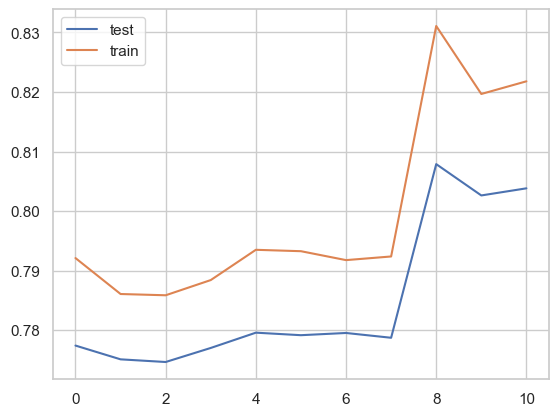

In [415]:
# retrieve performance metrics
res_xgb_tuned_test = grid_model_xgb.cv_results_['mean_test_score']
res_xgb_tuned_train = grid_model_xgb.cv_results_['mean_train_score'] 

plt.plot(res_xgb_tuned_test, label='test')
plt.plot(res_xgb_tuned_train, label='train')
plt.legend(loc='best')
plt.show()

In [369]:
# results of RandomSearchCV
cv_result = pd.DataFrame(grid_model_xgb.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
sorted = cv_result[retain_cols].sort_values('rank_test_score')
sorted.head(5)

,params,mean_test_score,rank_test_score
8,"{'colsample_bytree': 0.1, 'gamma': 0.55, 'lear...",0.807880,1
10,"{'colsample_bytree': 0.1, 'gamma': 0.55, 'lear...",0.803817,2
9,"{'colsample_bytree': 0.1, 'gamma': 0.55, 'lear...",0.802621,3
4,"{'colsample_bytree': 0.1, 'gamma': 0.55, 'lear...",0.779577,4
6,"{'colsample_bytree': 0.1, 'gamma': 0.55, 'lear...",0.779526,5


In [380]:
first_rank = sorted[:1].iloc[0, 0]
first_rank

{'colsample_bytree': 0.1,
 'gamma': 0.55,
 'learning_rate': 0.7,
 'max_depth': 7,
 'n_estimators': 3000,
 'reg_alpha': 18,
 'reg_lambda': 22,
 'subsample': 0.8}

In [382]:
xgb_clf_tuning = xgb.XGBClassifier(colsample_bytree=0.1, gamma=0.55, learning_rate=0.7,
                                   max_depth=7, n_estimators=3000, reg_alpha=18,
                                   reg_lambda=22, subsample=0.8)
xgb_clf_tuning.fit(X_train, y_train)
xgb_y_pred_test_t = xgb_clf_tuning.predict(X_test)

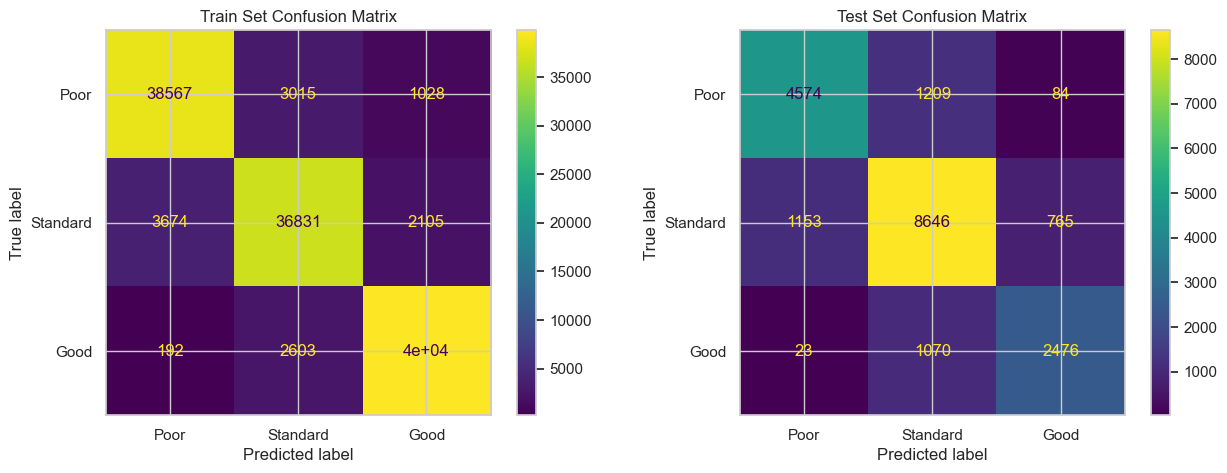

Classification Report for Train Set:
              precision    recall  f1-score   support

        Poor       0.91      0.91      0.91     42610
    Standard       0.87      0.86      0.87     42610
        Good       0.93      0.93      0.93     42610

    accuracy                           0.90    127830
   macro avg       0.90      0.90      0.90    127830
weighted avg       0.90      0.90      0.90    127830

Classification Report for Test Set:
              precision    recall  f1-score   support

        Poor       0.80      0.78      0.79      5867
    Standard       0.79      0.82      0.80     10564
        Good       0.74      0.69      0.72      3569

    accuracy                           0.78     20000
   macro avg       0.78      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000



In [408]:
plot_evaluation_metrics(xgb_clf_tuning, X_train, y_train, X_test, y_test)

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


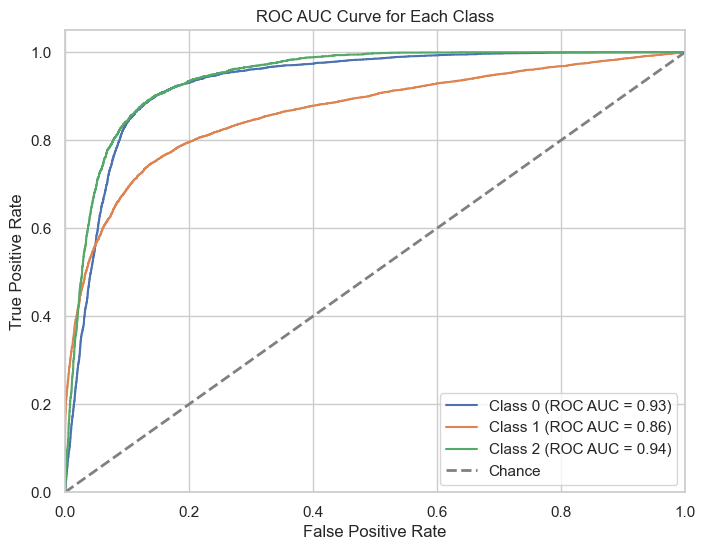

ROC AUC for Class 0: 0.93
ROC AUC for Class 1: 0.86
ROC AUC for Class 2: 0.94


In [412]:
plot_roc_auc(xgb_clf_tuning, X_test, y_test)

A slight accuracy increase of 4% from 74% to 78%, also improved F1-scores as follow below:
1. Poor Class, 0.75 -> 0.79
2. Standard Class, 0.78 -> 0.80
3. Good Class, 0.65 -> 0.72

Notes:
* *the one-vs-rest model is a defined heuristic method that leverages a binary classification algorithm for multi-class classifications. The technique involves splitting a multi-class dataset into multiple sets of binary problems*
* *The support values in the classification report reflect the true labels in the original test set, while the other metrics provide insights into how the model performs on the balanced dataset created using SMOTE* <br>
Source: https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b

In [421]:
explainer = Explainer(xgb_clf_tuning)
#sv = np.array(explainer.shap_values(X_test))
#ev = np.array(explainer.expected_value)

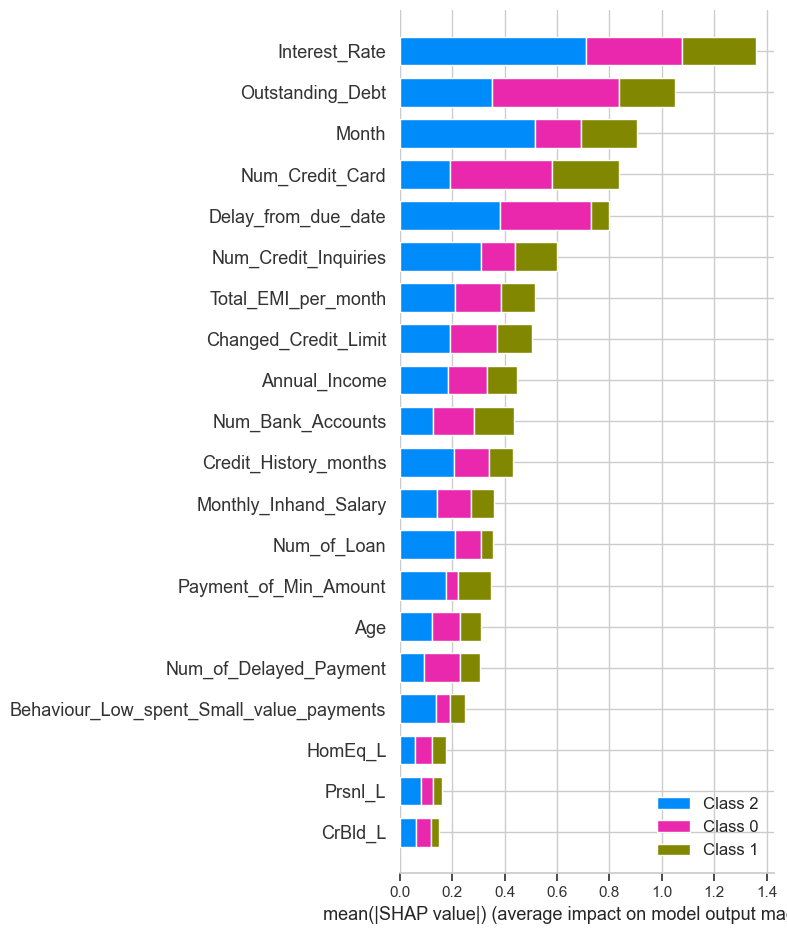

In [439]:
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, show=True)

# Save Model

In [448]:
# save the model to disk
#filename = 'XGB_creditscoring_final.obj'
#joblib.dump(xgb_clf_tuning, filename)

save_path = '/Users/agagoks/Documents/Dibimbing/Showcase Project/Credit Risk (Classification) Modeling/XGB_creditscoring_final.obj'

# Save the model to the specified path
with open(save_path, 'wb') as file:
    joblib.dump(xgb_clf_tuning, file)

['/Users/agagoks/Documents/Dibimbing/Showcase Project/Credit Risk (Classification) Modeling/XGB_creditscoring_final_11Sept23.pkl']

# Conclusion

The model with combination of manual and alternate data could have business impact of $970,450 due to its 78% performance in predicting credit scoring for each borrower, which enables provision of fair interest rate and reduce risk of potential default. As the result, KreditDulu can use the model as a more effective tool to do credit scoring.

# Recommendation:

1. Educating borrower to maintain their credit score which good for borrower (they can lend again and again), and good for lender (lower risk for default payment, faster repayment)
2. Enrich the model with more alternate data such as telecommunication transaction, e-commerce transaction, utility data, travel data, insurance data.
3. Exploring alternative method using machine learning/deep learning such as adaboost, SVM, neural network
4. Develop more to distinguish new borrower and existing borrower

# Source:

1. https://www.listendata.com/2019/08/credit-risk-modelling.html
2. https://www.investopedia.com/terms/d/defaultprobability.asp#:~:text=Default%20probability%2C%20or%20probability%20of,one%20gauge%20of%20default%20risk.
3. https://flinks.com/blog/loan-default-risk-prevention-and-management-in-economic-uncertainty/
4. https://www.investopedia.com/articles/pf/10/credit-score-factors.asp
5. https://www.creditkarma.com/advice/i/what-affects-your-credit-scores
6. https://www.sciencedirect.com/science/article/pii/S1877050922019287
7. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-023-00768-7
8. https://www.bis.org/publ/work834.pdf
9. https://www.researchgate.net/publication/330724392_An_Empirical_Comparison_of_Machine-Learning_Methods_on_Bank_Client_Credit_Assessments
10. https://altair.com/newsroom/articles/credit-scoring-series-part-eight-credit-risk-strategies
11. https://altair.com/newsroom/articles/credit-scoring-series-part-six-segmentation-and-reject-inference
12. https://id.blog.finantier.co/mengenal-credit-scoring-dan-teknologi-pendukungnya-8360edcf5c42
13. https://blog.finantier.co/the-importance-of-credit-scoring-to-support-fintech-business-e478e52891b4